# Problem Statement

Business Problem:

We all know that blood is really important for health care. We have seen many blood donation camps and almost all of us have helped them to raise blood in the blood bank.

A blood unit has a shelf life of 42 days only, that means if blood is not used within 42 days then it will be a waste, also shortage of the blood also increases many risky situations; hence, hospitals always have this problem in hand.” How much blood do they have to store..?”


Agenda for Day 1

Let's explore the data in reference to following hypothesis

Is there a variation in the blood requirement for a specific month ?? Is this variation same for all blood types
Has the above mentioned pattern changed over a period of time for all blood types
Can average be considered as a good statistical measure to guesstimate the future requirement for different blood types
Is there a consistent increase/decrease in the usage pattern for all blood types. Is this pattern additive or multiplicative.


Agenda for Day 2

Build various exponential smoothing models ,regression, naïve forecast models, simple average models etc. on the training data using multiple parameters  and check the performance on the test data using RMSE.

What are the pre-processing steps required for the given dataset (like imputation of missing values, check if the data is stationary or not etc.)
Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.   
Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE .
 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.  

# 1. Read the data as an appropriate Time Series data and plot the data.

## Importing Libraries, Reading the dataset

In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
df = pd.read_csv('c:/GL Class/Industry Session/30th Oct, 2021/Data.csv')

In [3]:
df.shape

(171, 7)

In [4]:
df.head()

YearMonth  Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
0   2005-01          1264.0             182            1525             159   
1   2005-02          1167.0             172            1427             153   
2   2005-03          1881.0             242            2149             223   
3   2005-04          1293.0             177            1557             164   
4   2005-05          1059.0             158            1314             142   

   Blood_group_O+  Blood_group_O-  
0           156.0              24  
1           152.0              26  
2           219.0              31  
3           163.0              25  
4           132.0              28

In [5]:
df.tail()

YearMonth  Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
166   2018-11          3816.0             431            4076             423   
167   2018-12          5992.0             646            6253             633   
168   2019-01           781.0             125            1047             120   
169   2019-02          1537.0             206            1799             193   
170   2019-03          1297.0             186            1557             166   

     Blood_group_O+  Blood_group_O-  
166           418.0              51  
167           631.0              77  
168           108.0              17  
169           182.0              29  
170           166.0              31

Data refers from Jan 2005 to March 2019.  It’’s a monthly Blood Consumption data. Creating monthly dates for timestamp from Jan 2005 to March 2019.

In [6]:
date = pd.date_range(start='01/2005', end='04/2019', freq='M')
date

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31'],
              dtype='datetime64[ns]', length=171, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

YearMonth  Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
166   2018-11          3816.0             431            4076             423   
167   2018-12          5992.0             646            6253             633   
168   2019-01           781.0             125            1047             120   
169   2019-02          1537.0             206            1799             193   
170   2019-03          1297.0             186            1557             166   

     Blood_group_O+  Blood_group_O- Time_Stamp  
166           418.0              51 2018-11-30  
167           631.0              77 2018-12-31  
168           108.0              17 2019-01-31  
169           182.0              29 2019-02-28  
170           166.0              31 2019-03-31

In [8]:
df = df.set_index('Time_Stamp')
df.head()

YearMonth  Blood_group_A+  Blood_group_A-  Blood_group_B+  \
Time_Stamp                                                             
2005-01-31   2005-01          1264.0             182            1525   
2005-02-28   2005-02          1167.0             172            1427   
2005-03-31   2005-03          1881.0             242            2149   
2005-04-30   2005-04          1293.0             177            1557   
2005-05-31   2005-05          1059.0             158            1314   

            Blood_group_B-  Blood_group_O+  Blood_group_O-  
Time_Stamp                                                  
2005-01-31             159           156.0              24  
2005-02-28             153           152.0              26  
2005-03-31             223           219.0              31  
2005-04-30             164           163.0              25  
2005-05-31             142           132.0              28

In [9]:
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
Time_Stamp                                                                   
2005-01-31          1264.0             182            1525             159   
2005-02-28          1167.0             172            1427             153   
2005-03-31          1881.0             242            2149             223   
2005-04-30          1293.0             177            1557             164   
2005-05-31          1059.0             158            1314             142   

            Blood_group_O+  Blood_group_O-  
Time_Stamp                                  
2005-01-31           156.0              24  
2005-02-28           152.0              26  
2005-03-31           219.0              31  
2005-04-30           163.0              25  
2005-05-31           132.0              28

In [10]:
df.describe()

Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
count      169.000000      171.000000      171.000000       171.00000   
mean      1977.568047      251.742690     2254.678363       235.51462   
std       1293.479958      130.093692     1303.793513       130.61850   
min        767.000000      124.000000     1018.000000       108.00000   
25%       1174.000000      171.000000     1437.500000       153.50000   
50%       1447.000000      198.000000     1728.000000       183.00000   
75%       2105.000000      265.500000     2394.000000       251.00000   
max       6824.000000      732.000000     7089.000000       724.00000   

       Blood_group_O+  Blood_group_O-  
count      170.000000      171.000000  
mean       231.588235       33.339181  
std        129.957689       13.444073  
min        108.000000       17.000000  
25%        148.250000       25.000000  
50%        178.000000       29.000000  
75%        245.250000       36.000000  
max        714.000000       79.000000

Coefficient of variation (CV=standard deviation / mean).As a rule of thumb, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance whereas those with a CV lower than 1 are considered to be low-variance. 

CV= std/mean and hence for the given data for all Blood Groups value is < 1 . So variation is considered low.

For all Blood Groups, huge difference is observed between minimum and maximum values, hence range is high. This could be because of seasonality and/or trend.


Blood Group A+ has 2 Null Values and Blood Group o+ has one null value. The same would be imputed appropriately

## Plotting the time-series

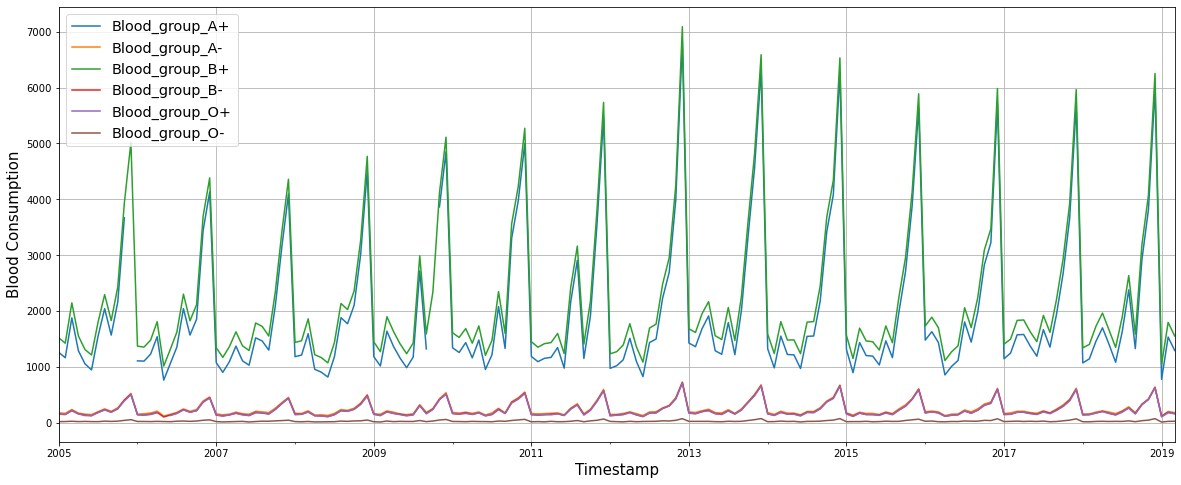

In [11]:
#Plotting the time-series
df.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

1) There seems to be a trend with a seasonality as well for all Blood Groups
2) Usage of Blood Group A+ and B+ is quite high and hence trends for other blood group is not clearly visible.
3) Consumption Pattern for A+ and B+ is quite similar.. Is this true for A- and B- as well.. Let's check it


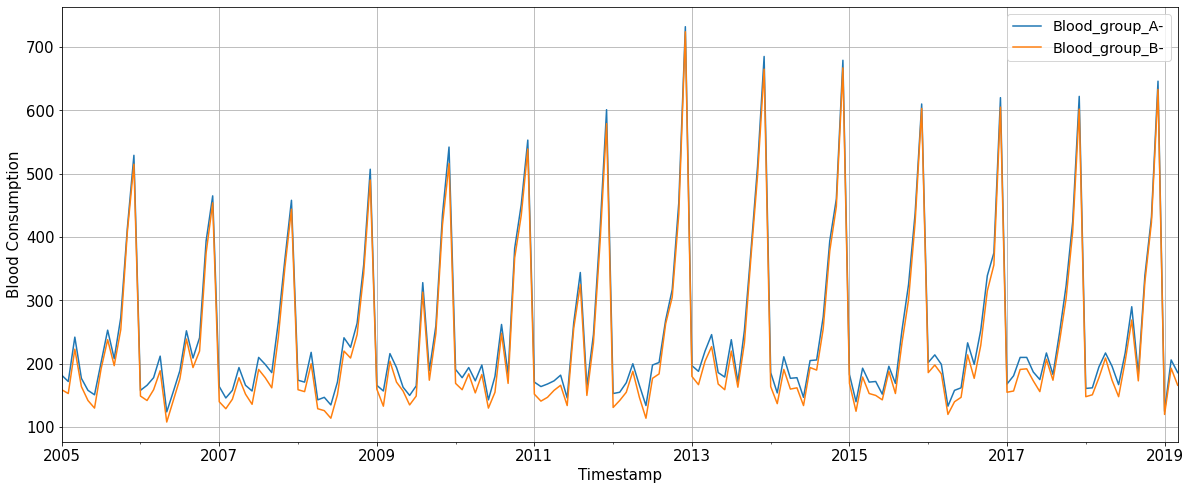

In [12]:
#Plotting the time-series
df[['Blood_group_A-','Blood_group_B-']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

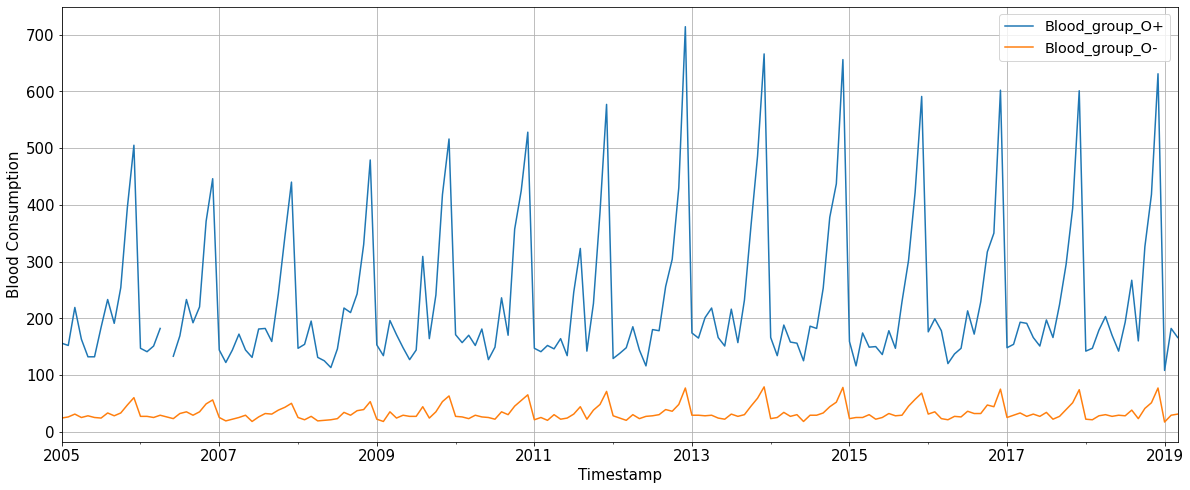

In [13]:
#Plotting the time-series
df[['Blood_group_O+','Blood_group_O-']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Blood Group O+ and Blood Group O- pattern is quite similar , however the consumption values are quite different.

## Checking for missing values

In [14]:
df.isnull().sum()

Blood_group_A+    2
Blood_group_A-    0
Blood_group_B+    0
Blood_group_B-    0
Blood_group_O+    1
Blood_group_O-    0
dtype: int64

In [15]:
# imputing using the Rolling Mean, Liner Interpolation, Time Interpolation, Cubic Interpolation and Quadratic Interpolation
df = df.assign(RollingMean=df['Blood_group_A+'].fillna(df['Blood_group_A+'].rolling(24,min_periods=1,).mean()))
df = df.assign(InterpolateLinear=df['Blood_group_A+'].interpolate(method='linear'))
df = df.assign(InterpolateTime=df['Blood_group_A+'].interpolate(method='time'))
df = df.assign(InterpolateCubic=df['Blood_group_A+'].interpolate(method='cubic'))
df = df.assign(InterpolateQuadratic=df['Blood_group_A+'].interpolate(method='quadratic'))
df.head(20)

Blood_group_A+  Blood_group_A-  Blood_group_B+  Blood_group_B-  \
Time_Stamp                                                                   
2005-01-31          1264.0             182            1525             159   
2005-02-28          1167.0             172            1427             153   
2005-03-31          1881.0             242            2149             223   
2005-04-30          1293.0             177            1557             164   
2005-05-31          1059.0             158            1314             142   
2005-06-30           949.0             151            1216             130   
2005-07-31          1555.0             202            1806             192   
2005-08-31          2045.0             253            2296             238   
2005-09-30          1572.0             208            1832             197   
2005-10-31          2165.0             273            2435             254   
2005-11-30          3670.0             414            3935             408   
2005-12-31             NaN             529            5021             515   
2006-01-31          1111.0             158            1374             149   
2006-02-28          1107.0             166            1358             142   
2006-03-31          1231.0             178            1482             159   
2006-04-30          1543.0             212            1812             189   
2006-05-31           767.0             124            1018             108   
2006-06-30          1062.0             156            1317             142   
2006-07-31          1358.0             189            1627             176   
2006-08-31          2046.0             252            2305             239   

            Blood_group_O+  Blood_group_O-  RollingMean  InterpolateLinear  \
Time_Stamp                                                                   
2005-01-31           156.0              24  1264.000000             1264.0   
2005-02-28           152.0              26  1167.000000             1167.0   
2005-03-31           219.0              31  1881.000000             1881.0   
2005-04-30           163.0              25  1293.000000             1293.0   
2005-05-31           132.0              28  1059.000000             1059.0   
2005-06-30           132.0              25   949.000000              949.0   
2005-07-31           184.0              24  1555.000000             1555.0   
2005-08-31           233.0              33  2045.000000             2045.0   
2005-09-30           191.0              28  1572.000000             1572.0   
2005-10-31           254.0              33  2165.000000             2165.0   
2005-11-30           395.0              47  3670.000000             3670.0   
2005-12-31           505.0              60  1692.727273             2390.5   
2006-01-31           147.0              27  1111.000000             1111.0   
2006-02-28           141.0              27  1107.000000             1107.0   
2006-03-31           151.0              25  1231.000000             1231.0   
2006-04-30           182.0              29  1543.000000             1543.0   
2006-05-31             NaN              26   767.000000              767.0   
2006-06-30           133.0              23  1062.000000             1062.0   
2006-07-31           169.0              32  1358.000000             1358.0   
2006-08-31           233.0              35  2046.000000             2046.0   

            InterpolateTime  InterpolateCubic  InterpolateQuadratic  
Time_Stamp                                                           
2005-01-31           1264.0       1264.000000           1264.000000  
2005-02-28           1167.0       1167.000000           1167.000000  
2005-03-31           1881.0       1881.000000           1881.000000  
2005-04-30           1293.0       1293.000000           1293.000000  
2005-05-31           1059.0       1059.000000           1059.000000  
2005-06-30            949.0        949.000000            949.000000  
2005-07-31        

Similar result for all techniques.. EVen the below plot also displays the same behaviour.

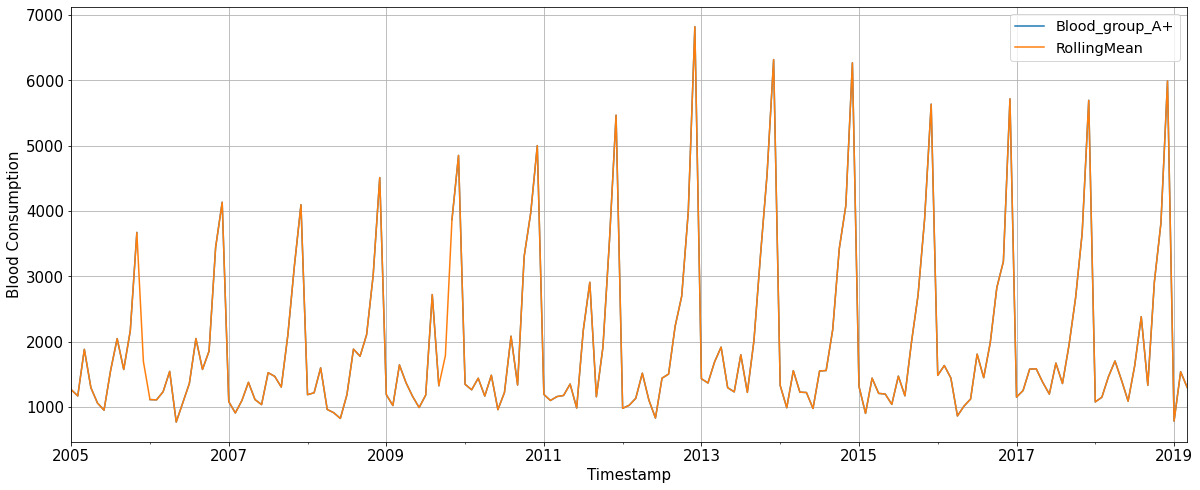

In [16]:
df[['Blood_group_A+','RollingMean']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

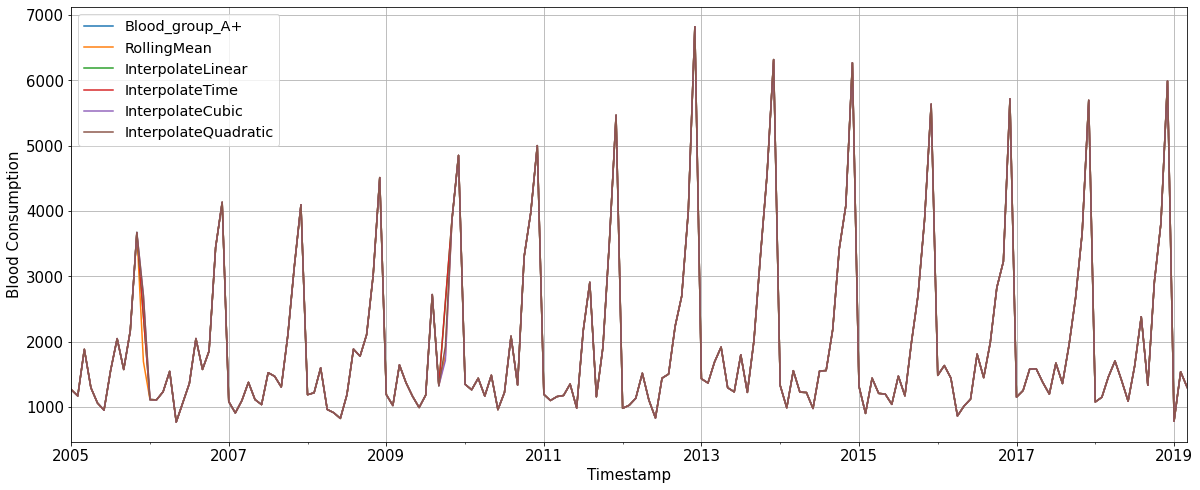

In [17]:
df[['Blood_group_A+','RollingMean','InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [18]:
#Imputing missing values as rolling mean
df.drop(['Blood_group_A+'],axis=1,inplace=True)
df.rename(columns={'RollingMean': 'Blood_group_A+'}, inplace = True)
df.head()

Blood_group_A-  Blood_group_B+  Blood_group_B-  Blood_group_O+  \
Time_Stamp                                                                   
2005-01-31             182            1525             159           156.0   
2005-02-28             172            1427             153           152.0   
2005-03-31             242            2149             223           219.0   
2005-04-30             177            1557             164           163.0   
2005-05-31             158            1314             142           132.0   

            Blood_group_O-  Blood_group_A+  InterpolateLinear  \
Time_Stamp                                                      
2005-01-31              24          1264.0             1264.0   
2005-02-28              26          1167.0             1167.0   
2005-03-31              31          1881.0             1881.0   
2005-04-30              25          1293.0             1293.0   
2005-05-31              28          1059.0             1059.0   

            InterpolateTime  InterpolateCubic  InterpolateQuadratic  
Time_Stamp                                                           
2005-01-31           1264.0            1264.0                1264.0  
2005-02-28           1167.0            1167.0                1167.0  
2005-03-31           1881.0            1881.0                1881.0  
2005-04-30           1293.0            1293.0                1293.0  
2005-05-31           1059.0            1059.0                1059.0

In [19]:
df.drop(['InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic'],axis=1,inplace=True)


In [20]:
df.head()

Blood_group_A-  Blood_group_B+  Blood_group_B-  Blood_group_O+  \
Time_Stamp                                                                   
2005-01-31             182            1525             159           156.0   
2005-02-28             172            1427             153           152.0   
2005-03-31             242            2149             223           219.0   
2005-04-30             177            1557             164           163.0   
2005-05-31             158            1314             142           132.0   

            Blood_group_O-  Blood_group_A+  
Time_Stamp                                  
2005-01-31              24          1264.0  
2005-02-28              26          1167.0  
2005-03-31              31          1881.0  
2005-04-30              25          1293.0  
2005-05-31              28          1059.0

In [21]:
# imputing using the Rolling Mean, Liner Interpolation, Time Interpolation, Cubic Interpolation and Quadratic Interpolation
df = df.assign(RollingMean=df['Blood_group_O+'].fillna(df['Blood_group_O+'].rolling(24,min_periods=1,).mean()))
df = df.assign(InterpolateLinear=df['Blood_group_O+'].interpolate(method='linear'))
df = df.assign(InterpolateTime=df['Blood_group_O+'].interpolate(method='time'))
df = df.assign(InterpolateCubic=df['Blood_group_O+'].interpolate(method='cubic'))
df = df.assign(InterpolateQuadratic=df['Blood_group_O+'].interpolate(method='quadratic'))
df.head(20)

Blood_group_A-  Blood_group_B+  Blood_group_B-  Blood_group_O+  \
Time_Stamp                                                                   
2005-01-31             182            1525             159           156.0   
2005-02-28             172            1427             153           152.0   
2005-03-31             242            2149             223           219.0   
2005-04-30             177            1557             164           163.0   
2005-05-31             158            1314             142           132.0   
2005-06-30             151            1216             130           132.0   
2005-07-31             202            1806             192           184.0   
2005-08-31             253            2296             238           233.0   
2005-09-30             208            1832             197           191.0   
2005-10-31             273            2435             254           254.0   
2005-11-30             414            3935             408           395.0   
2005-12-31             529            5021             515           505.0   
2006-01-31             158            1374             149           147.0   
2006-02-28             166            1358             142           141.0   
2006-03-31             178            1482             159           151.0   
2006-04-30             212            1812             189           182.0   
2006-05-31             124            1018             108             NaN   
2006-06-30             156            1317             142           133.0   
2006-07-31             189            1627             176           169.0   
2006-08-31             252            2305             239           233.0   

            Blood_group_O-  Blood_group_A+  RollingMean  InterpolateLinear  \
Time_Stamp                                                                   
2005-01-31              24     1264.000000     156.0000              156.0   
2005-02-28              26     1167.000000     152.0000              152.0   
2005-03-31              31     1881.000000     219.0000              219.0   
2005-04-30              25     1293.000000     163.0000              163.0   
2005-05-31              28     1059.000000     132.0000              132.0   
2005-06-30              25      949.000000     132.0000              132.0   
2005-07-31              24     1555.000000     184.0000              184.0   
2005-08-31              33     2045.000000     233.0000              233.0   
2005-09-30              28     1572.000000     191.0000              191.0   
2005-10-31              33     2165.000000     254.0000              254.0   
2005-11-30              47     3670.000000     395.0000              395.0   
2005-12-31              60     1692.727273     505.0000              505.0   
2006-01-31              27     1111.000000     147.0000              147.0   
2006-02-28              27     1107.000000     141.0000              141.0   
2006-03-31              25     1231.000000     151.0000              151.0   
2006-04-30              29     1543.000000     182.0000              182.0   
2006-05-31              26      767.000000     208.5625              157.5   
2006-06-30              23     1062.000000     133.0000              133.0   
2006-07-31              32     1358.000000     169.0000              169.0   
2006-08-31              35     2046.000000     233.0000              233.0   

            InterpolateTime  InterpolateCubic  InterpolateQuadratic  
Time_Stamp                                                           
2005-01-31       156.000000        156.000000            156.000000  
2005-02-28       152.000000        152.000000            152.000000  
2005-03-31       219.000000        219.000000            219.000000  
2005-04-30       163.000000        163.000000            163.000000  
2005-05-31       132.000000        132.000000            132.000000  
2005-06-30       132.000000        132.000000            132.000000  
2005-07-31       1

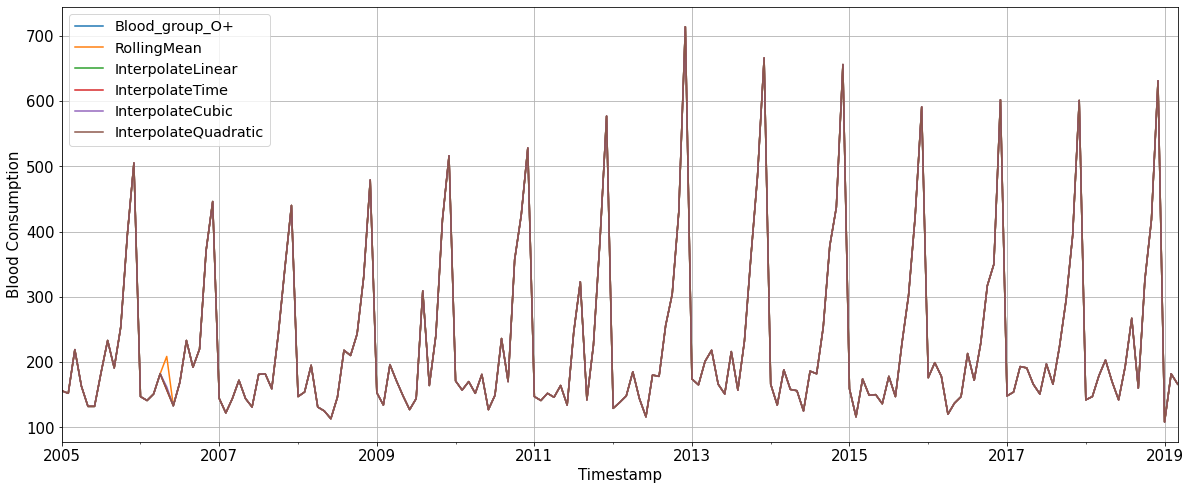

In [22]:
df[['Blood_group_O+','RollingMean','InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [23]:
#Imputing missing values as rolling mean
df.drop(['Blood_group_O+'],axis=1,inplace=True)
df.rename(columns={'RollingMean': 'Blood_group_O+'}, inplace = True)
df.head()

Blood_group_A-  Blood_group_B+  Blood_group_B-  Blood_group_O-  \
Time_Stamp                                                                   
2005-01-31             182            1525             159              24   
2005-02-28             172            1427             153              26   
2005-03-31             242            2149             223              31   
2005-04-30             177            1557             164              25   
2005-05-31             158            1314             142              28   

            Blood_group_A+  Blood_group_O+  InterpolateLinear  \
Time_Stamp                                                      
2005-01-31          1264.0           156.0              156.0   
2005-02-28          1167.0           152.0              152.0   
2005-03-31          1881.0           219.0              219.0   
2005-04-30          1293.0           163.0              163.0   
2005-05-31          1059.0           132.0              132.0   

            InterpolateTime  InterpolateCubic  InterpolateQuadratic  
Time_Stamp                                                           
2005-01-31            156.0             156.0                 156.0  
2005-02-28            152.0             152.0                 152.0  
2005-03-31            219.0             219.0                 219.0  
2005-04-30            163.0             163.0                 163.0  
2005-05-31            132.0             132.0                 132.0

In [24]:
df.drop(['InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic'],axis=1,inplace=True)

In [25]:
df.head()

Blood_group_A-  Blood_group_B+  Blood_group_B-  Blood_group_O-  \
Time_Stamp                                                                   
2005-01-31             182            1525             159              24   
2005-02-28             172            1427             153              26   
2005-03-31             242            2149             223              31   
2005-04-30             177            1557             164              25   
2005-05-31             158            1314             142              28   

            Blood_group_A+  Blood_group_O+  
Time_Stamp                                  
2005-01-31          1264.0           156.0  
2005-02-28          1167.0           152.0  
2005-03-31          1881.0           219.0  
2005-04-30          1293.0           163.0  
2005-05-31          1059.0           132.0

In [26]:
df.isnull().sum()

Blood_group_A-    0
Blood_group_B+    0
Blood_group_B-    0
Blood_group_O-    0
Blood_group_A+    0
Blood_group_O+    0
dtype: int64

## Plotting the final data

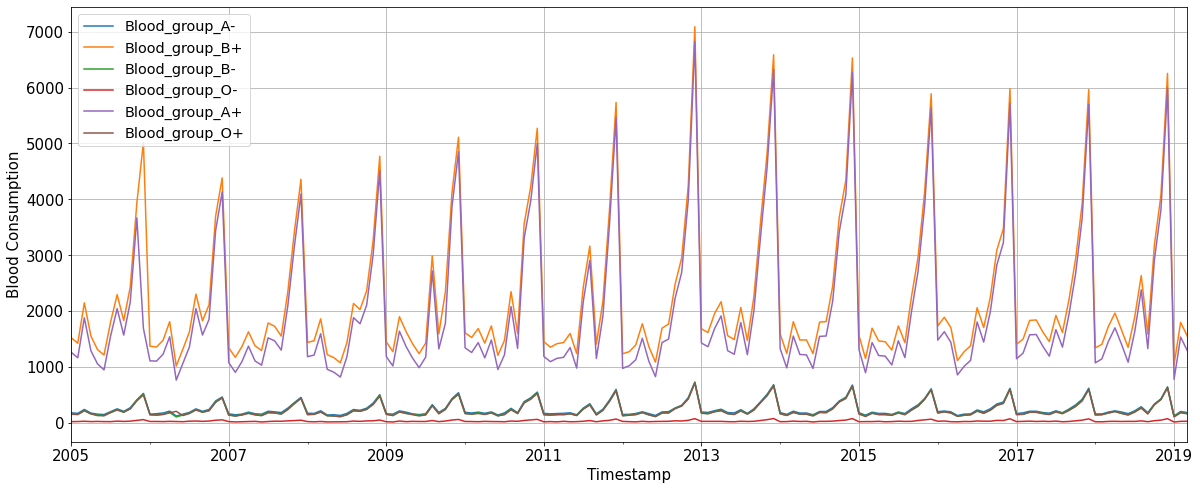

In [27]:
#Plotting the time-series
df.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [28]:
df_sub=df[['Blood_group_A-']] ## Performing EDA for one of the Blood Group
df_sub.head()

Blood_group_A-
Time_Stamp                
2005-01-31             182
2005-02-28             172
2005-03-31             242
2005-04-30             177
2005-05-31             158

## Yearly Boxplot

No handles with labels found to put in legend.


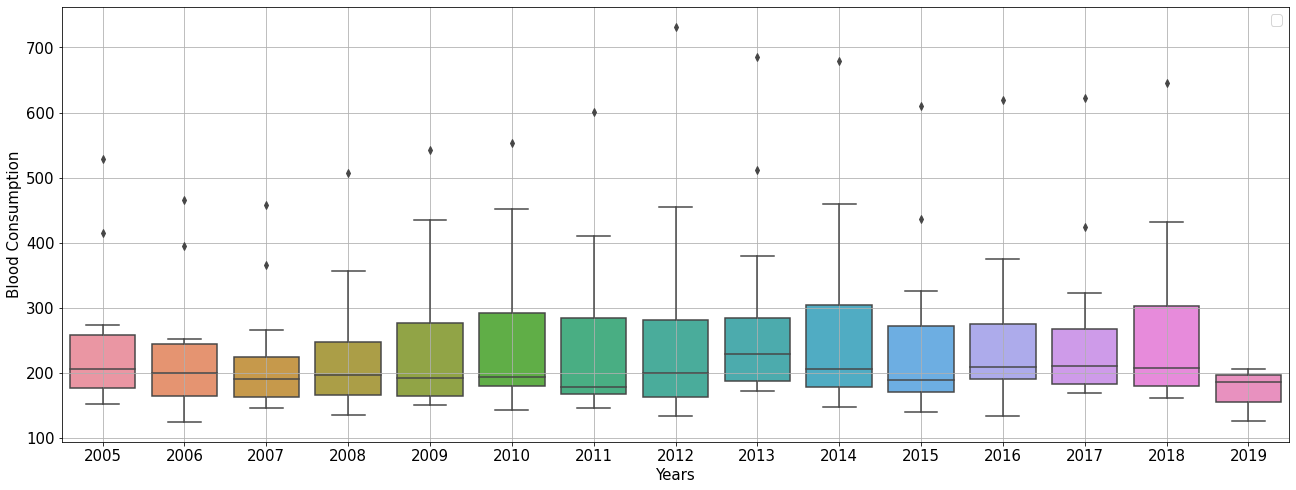

In [29]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_sub.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Above plot suggests that series does not have a significant trend. However seasonality is clearly visible across all years.

Also, we see that the Blood Consumption has some outliers/extreme values for multiple years



## Monthly Boxplot

No handles with labels found to put in legend.


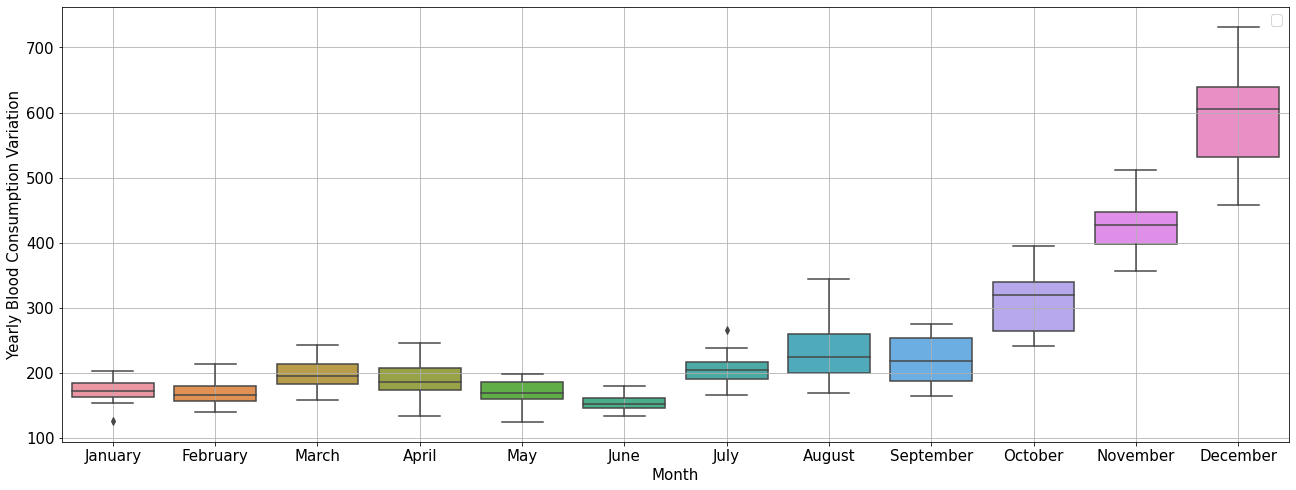

In [30]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_sub.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Blood Consumption Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

It appears that we have a huge seasonal component each year. 

Last quarter of every year records very high consumption.

Only one extreme value each for the month of Jan and July


## Monthly Consumption across years

In [31]:
monthly_BloodC_across_years = pd.pivot_table(df_sub, values = 'Blood_group_A-', columns = df_sub.index.month_name(), index = df_sub.index.year)
monthly_BloodC_across_years

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
2005        177.0   253.0     529.0     172.0    182.0  202.0  151.0  242.0   
2006        212.0   252.0     465.0     166.0    158.0  189.0  156.0  178.0   
2007        194.0   199.0     458.0     146.0    164.0  210.0  157.0  158.0   
2008        143.0   241.0     507.0     171.0    174.0  171.0  135.0  218.0   
2009        194.0   328.0     542.0     157.0    166.0  165.0  150.0  216.0   
2010        173.0   262.0     553.0     178.0    191.0  180.0  143.0  194.0   
2011        173.0   344.0     601.0     164.0    171.0  265.0  146.0  168.0   
2012        200.0   202.0     732.0     155.0    153.0  198.0  134.0  170.0   
2013        246.0   171.0     685.0     188.0    197.0  238.0  179.0  220.0   
2014        177.0   206.0     679.0     154.0    186.0  205.0  147.0  211.0   
2015        171.0   169.0     610.0     140.0    183.0  196.0  152.0  193.0   
2016        133.0   199.0     620.0     214.0    202.0  233.0  162.0  199.0   
2017        210.0   183.0     622.0     181.0    168.0  217.0  175.0  210.0   
2018        217.0   290.0     646.0     162.0    161.0  217.0  167.0  195.0   
2019          NaN     NaN       NaN     206.0    125.0    NaN    NaN  186.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
2005        158.0     414.0    273.0      208.0  
2006        124.0     394.0    241.0      209.0  
2007        166.0     365.0    266.0      186.0  
2008        147.0     356.0    264.0      226.0  
2009        163.0     435.0    260.0      189.0  
2010        198.0     451.0    382.0      183.0  
2011        182.0     410.0    246.0      164.0  
2012        166.0     454.0    317.0      269.0  
2013        186.0     512.0    379.0      253.0  
2014        178.0     460.0    394.0      274.0  
2015        172.0     437.0    325.0      253.0  
2016        158.0     375.0    339.0      253.0  
2017        187.0     424.0    323.0      249.0  
2018        196.0     431.0    339.0      184.0  
2019          NaN       NaN      NaN        NaN

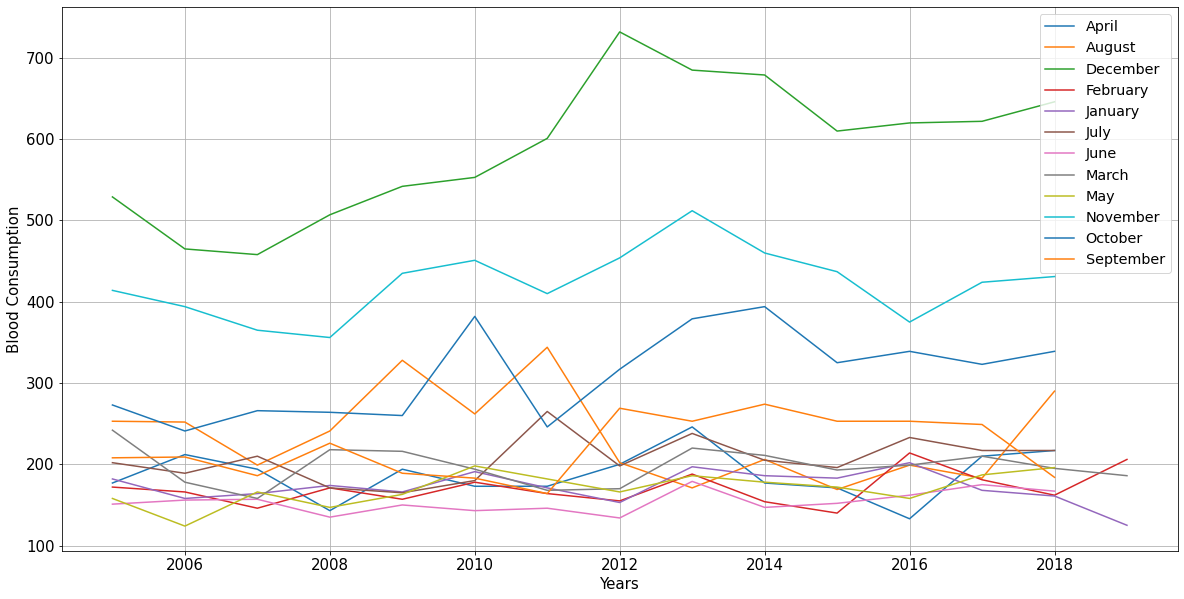

In [32]:
monthly_BloodC_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

December has highest Consumption across all the years.
Every month has a different trend across all years


## Quarterly Consumption across years

In [33]:
quarterly_BloodC = pd.pivot_table(df_sub, values = "Blood_group_A-", columns = df_sub.index.quarter, index = df_sub.index.year)
quarterly_BloodC



Time_Stamp           1           2           3           4
Time_Stamp                                                
2005        198.666667  162.000000  221.000000  405.333333
2006        167.333333  164.000000  216.666667  366.666667
2007        156.000000  172.333333  198.333333  363.000000
2008        187.666667  141.666667  212.666667  375.666667
2009        179.666667  169.000000  227.333333  412.333333
2010        187.666667  171.333333  208.333333  462.000000
2011        167.666667  167.000000  257.666667  419.000000
2012        159.333333  166.666667  223.000000  501.000000
2013        201.666667  203.666667  220.666667  525.333333
2014        183.666667  167.333333  228.333333  511.000000
2015        172.000000  165.000000  206.000000  457.333333
2016        205.000000  151.000000  228.333333  444.666667
2017        186.333333  190.666667  216.333333  456.333333
2018        172.666667  193.333333  230.333333  472.000000
2019        172.333333         NaN         NaN         NaN

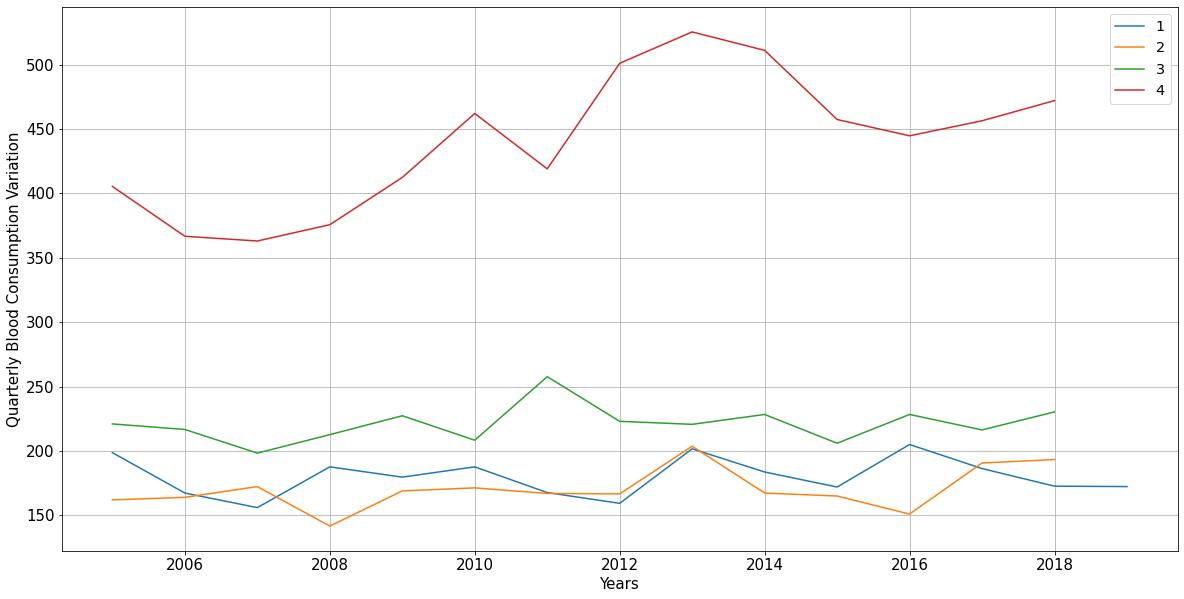

In [34]:
quarterly_BloodC.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Blood Consumption Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

## As seen from the above plot, Q4 has the highest consumption. After that Q3. Q2 and Q1 have lowest consumption. Difference between highest and lowest value is quite wide.

## Plotting the time series monthplot to understand the spread of Consumption across different years and within different months across years.

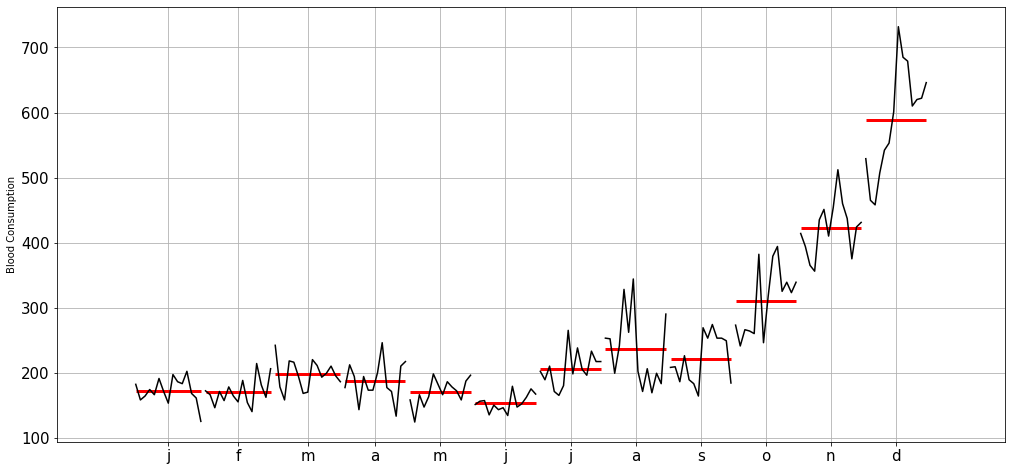

In [35]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_sub['Blood_group_A-'],ylabel='Blood Consumption')
plt.grid();

	For most of the months consumption for a month is almost constant over the years till July.

	Consumption is highest for the month of December


## Plotting the Empirical Cumulative Distribution.

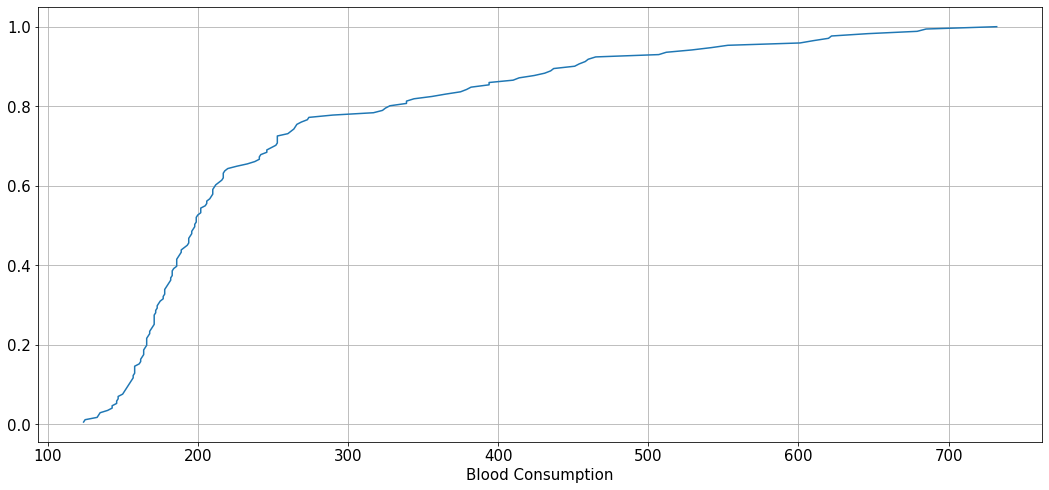

In [36]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_sub['Blood_group_A-'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Blood Consumption', fontsize = 15);

	Around 60% of all the months had 200 unit or lesser consumption

	Around 90% of all the months had 400 unit or lesser consumption


## Plot the average consumption per month and the month on month percentage change of consumption.

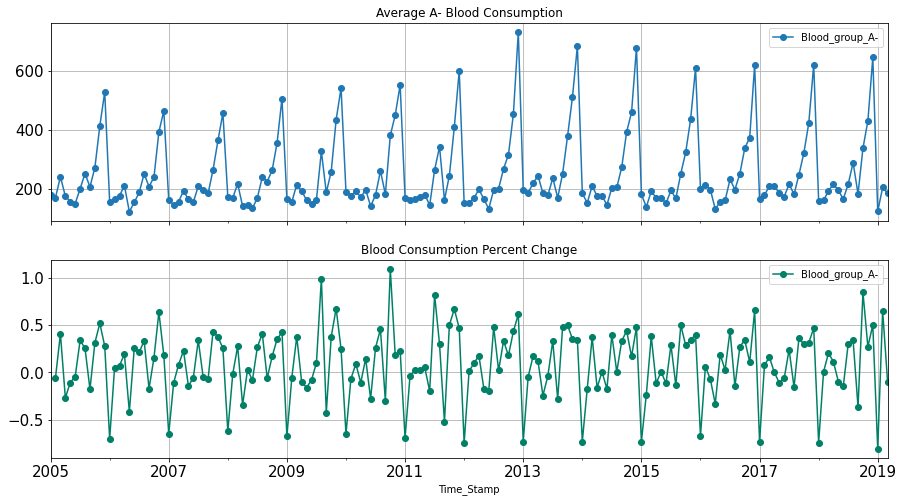

In [37]:
# group by date and get average Customers, and precent change
average    = df_sub.groupby(df_sub.index)["Blood_group_A-"].mean()
pct_change = df_sub.groupby(df_sub.index)["Blood_group_A-"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average A- Blood Consumption",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Blood Consumption Percent Change",grid=True)

There is huge percentage change in Consumption from December to January.Definitely need to analyse this change because the same could be realted to spread of some specific disease because of the change in environmental condition.

## Plot Blood Consumption for every year

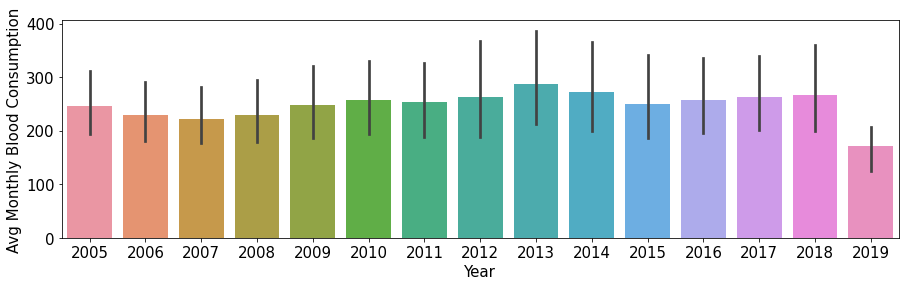

In [38]:
## Plot consumption for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_sub.index.year, y=df_sub.values[:,0], data=df_sub, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Blood Consumption', fontsize = 15);

It can be seen that, the average monthly consumption is almost constant except for the year 2013 which should a peak.

## Yearly Total Blood Consumption

In [39]:
monthly_BloodC_across_years = pd.pivot_table(df_sub, values = "Blood_group_A-", columns = df_sub.index.month_name(), index = df_sub.index.year)
yearly_total_BloodC = monthly_BloodC_across_years.sum(axis = 1) 
yearly_total_BloodC


Time_Stamp
2005    2961.0
2006    2744.0
2007    2669.0
2008    2753.0
2009    2965.0
2010    3088.0
2011    3034.0
2012    3150.0
2013    3454.0
2014    3271.0
2015    3001.0
2016    3087.0
2017    3149.0
2018    3205.0
2019     517.0
dtype: float64

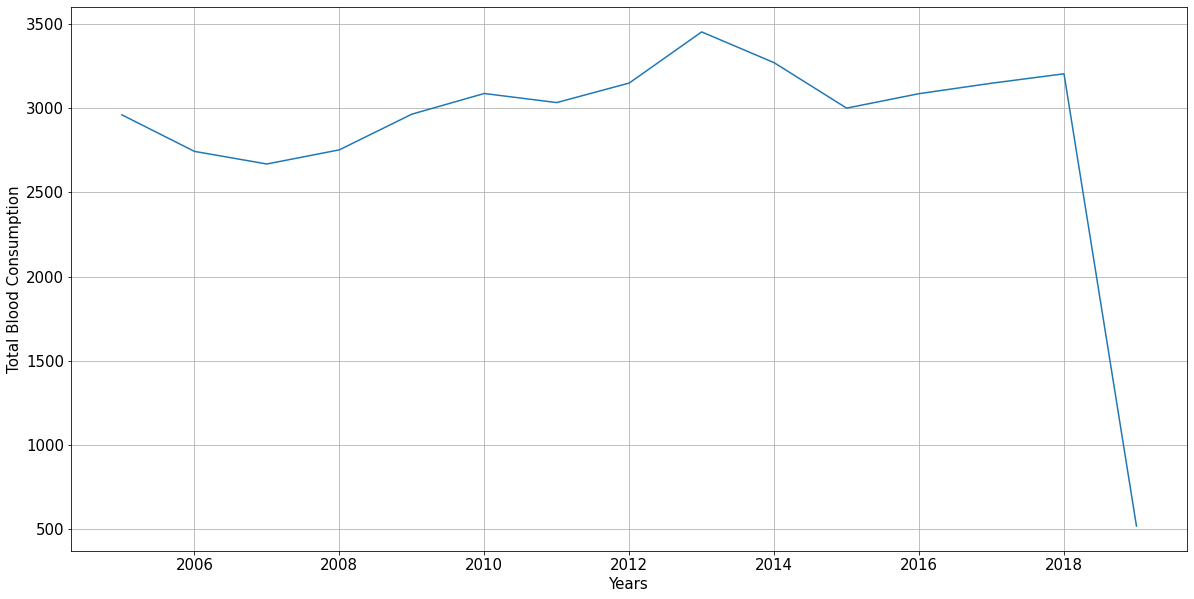

In [40]:
yearly_total_BloodC.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)


As it can be seen that total blood consumption shows a slight variation. Initially there was a slight dip in year 2007 but then it picked up with a high value in 2010 and then showing a dip in 2011 before reaching the highest value in 2013.

Dip in 2019 is because we have a data only for 3 months - pre covid scenario.


## Decompose the Time Series and plot the different components.

### Assuming additive decomposition

In [41]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

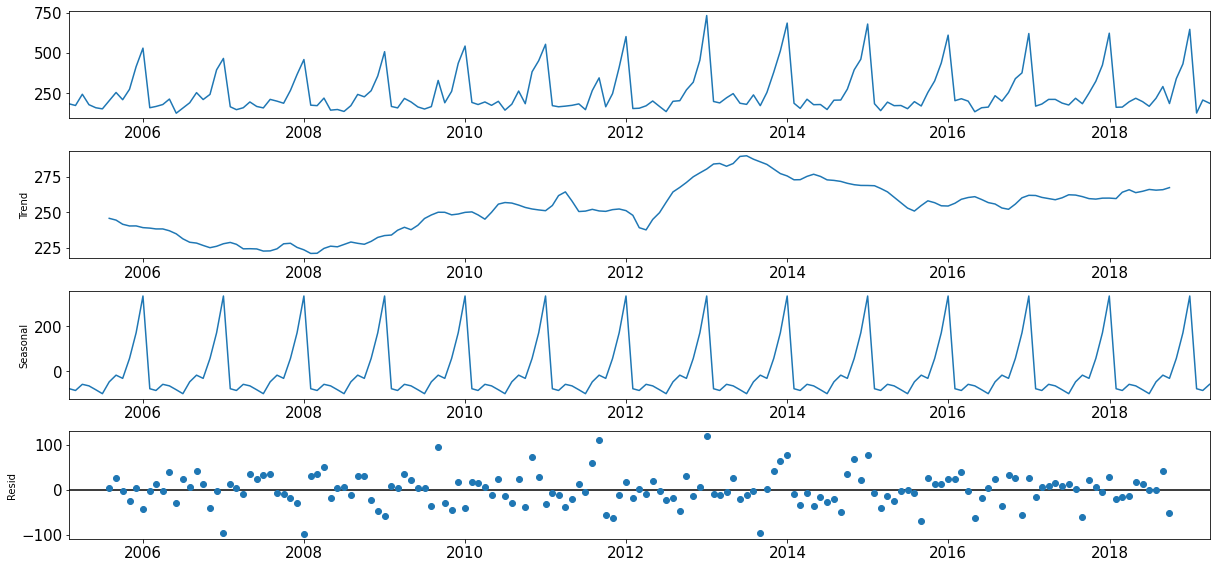

In [42]:
decomposition = seasonal_decompose(df_sub,model='additive')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


### Assuming multiplicative decomposition

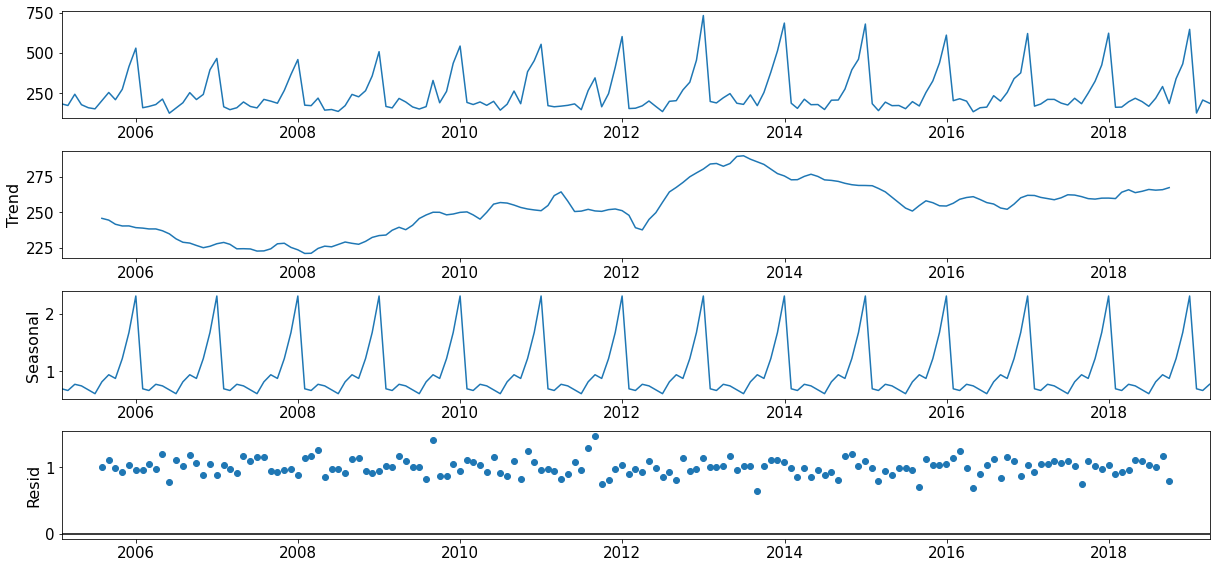

In [43]:
decomposition = seasonal_decompose(df_sub,model='multiplicative')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In both multiplicative and additive model, We observe that the trend and seasonality are clearly separated and scale of noise is small. As there was no change which was observed in the noise level between two graphs, assumption is that series is additive in nature

In [44]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2005-01-31           NaN
2005-02-28           NaN
2005-03-31           NaN
2005-04-30           NaN
2005-05-31           NaN
2005-06-30           NaN
2005-07-31    245.750000
2005-08-31    244.500000
2005-09-30    241.583333
2005-10-31    240.375000
2005-11-30    240.416667
2005-12-31    239.208333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2005-01-31    0.694943
2005-02-28    0.665450
2005-03-31    0.773106
2005-04-30    0.745614
2005-05-31    0.676301
2005-06-30    0.609879
2005-07-31    0.815972
2005-08-31    0.939141
2005-09-30    0.875475
2005-10-31    1.220548
2005-11-30    1.674458
2005-12-31    2.309112
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2005-01-31         NaN
2005-02-28         NaN
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31    1.007355
2005-08-31    1.101821
2005-09-30    0.983451
2005-10-31    0.930504
2005-11-30    1.028399
2005-12-31    0.957711
Name: resid, dtype:

Because of limitation of python, first 6 months data is not visible for a monthly series.

## 3. Split the data into training and test. The test data should start in 2018.

In [45]:
df_sub.index.year

Int64Index([2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019],
           dtype='int64', name='Time_Stamp', length=171)

In [46]:
train= df_sub[df_sub.index.year < 2018]
train.shape

(156, 1)

In [47]:
train.tail()

Blood_group_A-
Time_Stamp                
2017-08-31             183
2017-09-30             249
2017-10-31             323
2017-11-30             424
2017-12-31             622

In [48]:
test= df_sub[df_sub.index.year >2017]
test.shape

(15, 1)

In [49]:
test.head()

Blood_group_A-
Time_Stamp                
2018-01-31             161
2018-02-28             162
2018-03-31             195
2018-04-30             217
2018-05-31             196

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

## Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Blood Group A-' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [50]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [51]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Blood_group_A-  time
Time_Stamp                      
2005-01-31             182     1
2005-02-28             172     2
2005-03-31             242     3
2005-04-30             177     4
2005-05-31             158     5 

Last few rows of Training Data 
             Blood_group_A-  time
Time_Stamp                      
2017-08-31             183   152
2017-09-30             249   153
2017-10-31             323   154
2017-11-30             424   155
2017-12-31             622   156 

First few rows of Test Data 
             Blood_group_A-  time
Time_Stamp                      
2018-01-31             161   133
2018-02-28             162   134
2018-03-31             195   135
2018-04-30             217   136
2018-05-31             196   137 

Last few rows of Test Data 
             Blood_group_A-  time
Time_Stamp                      
2018-11-30             431   143
2018-12-31             646   144
2019-01-31             125   145
2019-02-28

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train["Blood_group_A-"].values)

LinearRegression()

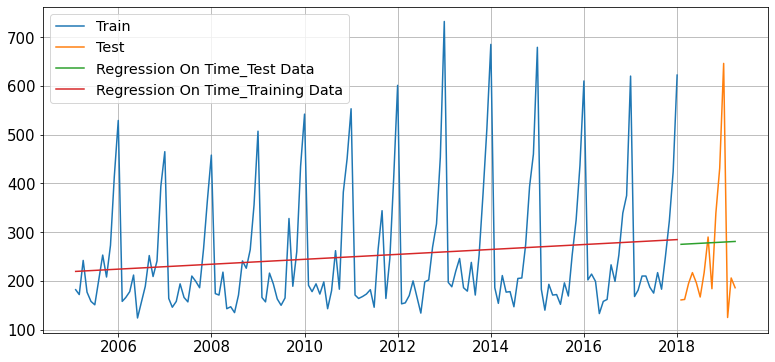

In [56]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train["Blood_group_A-"], label='Train')
plt.plot(test["Blood_group_A-"], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [57]:
from sklearn import metrics

In [58]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model1 Evaluation (Linear Regression)

In [59]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train["Blood_group_A-"],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train["Blood_group_A-"],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 128.233 MAPE is 38.15


In [60]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test["Blood_group_A-"],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test["Blood_group_A-"],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 133.356 MAPE is 43.74


In [61]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

Model   Test RMSE  Test MAPE
Model 1  RegressionOnTime  133.355698      43.74

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.¶

In [62]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [63]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train["Blood_group_A-"])[len(np.asarray(train["Blood_group_A-"]))-1]
NaiveModel_train['naive'].head()

Time_Stamp
2005-01-31    622
2005-02-28    622
2005-03-31    622
2005-04-30    622
2005-05-31    622
Name: naive, dtype: int64

In [64]:
NaiveModel_test['naive'] = np.asarray(train["Blood_group_A-"])[len(np.asarray(train["Blood_group_A-"]))-1]
NaiveModel_test['naive'].head()

Time_Stamp
2018-01-31    622
2018-02-28    622
2018-03-31    622
2018-04-30    622
2018-05-31    622
Name: naive, dtype: int64

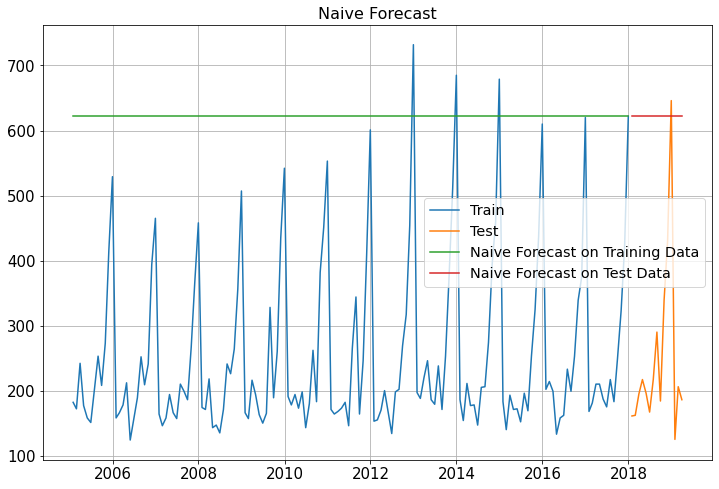

In [65]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train["Blood_group_A-"], label='Train')
plt.plot(test["Blood_group_A-"], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

### Model2 Evaluation (Naive Approach)

In [66]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train["Blood_group_A-"],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train["Blood_group_A-"],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 391.964 MAPE is 147.91


In [67]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test["Blood_group_A-"],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test["Blood_group_A-"],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 396.011 MAPE is 151.96


In [68]:
resultsDf_2 = pd.DataFrame({'Model': 'NaiveModel', 
                                                      
                            'Test RMSE': [rmse_model2_test],
                            'Test MAPE': [mape_model2_test]},index=['Model 2'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Model   Test RMSE  Test MAPE
Model 1  RegressionOnTime  133.355698      43.74
Model 2        NaiveModel  396.011448     151.96

## Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.¶

In [69]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [70]:
## Let us get the average of  the training set.

SimpleAverage_train['mean_forecast'] = train["Blood_group_A-"].mean()
SimpleAverage_train.head()

Blood_group_A-  mean_forecast
Time_Stamp                               
2005-01-31             182     252.089744
2005-02-28             172     252.089744
2005-03-31             242     252.089744
2005-04-30             177     252.089744
2005-05-31             158     252.089744

In [71]:
SimpleAverage_test['mean_forecast'] = train["Blood_group_A-"].mean()
SimpleAverage_test.head()

Blood_group_A-  mean_forecast
Time_Stamp                               
2018-01-31             161     252.089744
2018-02-28             162     252.089744
2018-03-31             195     252.089744
2018-04-30             217     252.089744
2018-05-31             196     252.089744

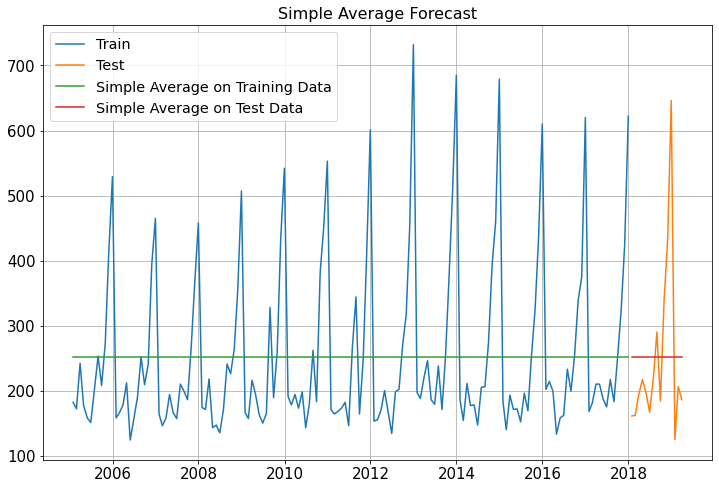

In [72]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train["Blood_group_A-"], label='Train')
plt.plot(SimpleAverage_test["Blood_group_A-"], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

### Model3 Evaluation (Simple Average)

In [73]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train["Blood_group_A-"],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train["Blood_group_A-"],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 129.625 MAPE is 38.23


In [74]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test["Blood_group_A-"],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test["Blood_group_A-"],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 130.631 MAPE is 39.08


In [75]:
resultsDf_3 = pd.DataFrame({'Model': 'SimpleAverage', 
                            
                            'Test RMSE': [rmse_model3_test],
                            'Test MAPE': [mape_model3_test]}
                           ,index=['Model 3'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Model   Test RMSE  Test MAPE
Model 1  RegressionOnTime  133.355698      43.74
Model 2        NaiveModel  396.011448     151.96
Model 3     SimpleAverage  130.630913      39.08

## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [76]:
MovingAverage = df_sub.copy()
MovingAverage.head()

Blood_group_A-
Time_Stamp                
2005-01-31             182
2005-02-28             172
2005-03-31             242
2005-04-30             177
2005-05-31             158

In [77]:

MovingAverage['Trailing_2'] = MovingAverage["Blood_group_A-"].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage["Blood_group_A-"].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage["Blood_group_A-"].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage["Blood_group_A-"].rolling(9).mean()

MovingAverage.head()

Blood_group_A-  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                                
2005-01-31             182         NaN         NaN         NaN         NaN
2005-02-28             172       177.0         NaN         NaN         NaN
2005-03-31             242       207.0         NaN         NaN         NaN
2005-04-30             177       209.5      193.25         NaN         NaN
2005-05-31             158       167.5      187.25         NaN         NaN

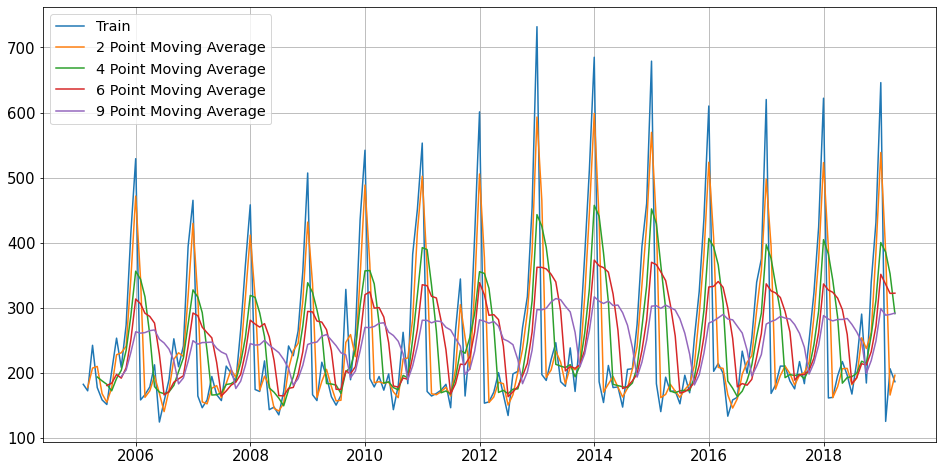

In [78]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Blood_group_A-"], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

In [79]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 2018] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >2017]

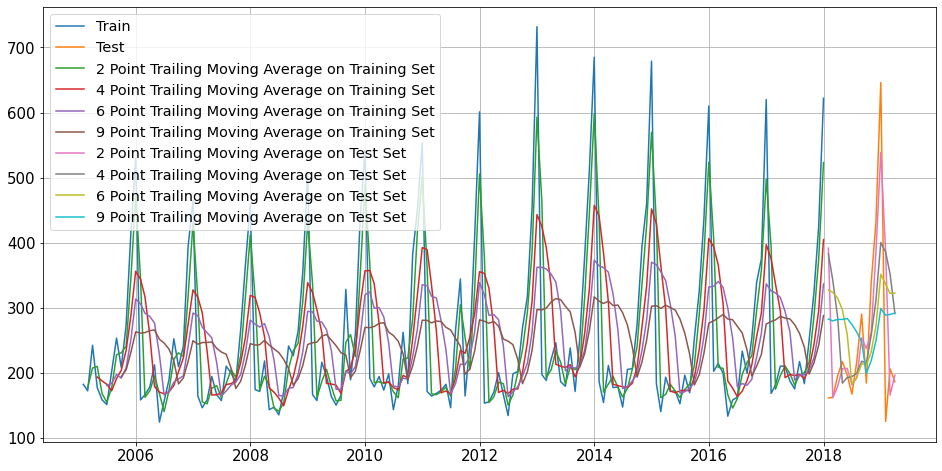

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train["Blood_group_A-"], label='Train')
plt.plot(trailing_MovingAverage_test["Blood_group_A-"], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

### Model 4 Evaluation (Moving Average)

In [81]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test["Blood_group_A-"],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 99.294 MAPE is 25.26
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 136.520 MAPE is 43.91
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 138.070 MAPE is 47.25
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 135.835 MAPE is 45.41


In [82]:

resultsDf_4 = pd.DataFrame({'Model': ['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'],    
                            'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['Model 4.1','Model 4.2'
                                   ,'Model 4.3','Model 4.4'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Model   Test RMSE  Test MAPE
Model 1               RegressionOnTime  133.355698      43.74
Model 2                     NaiveModel  396.011448     151.96
Model 3                  SimpleAverage  130.630913      39.08
Model 4.1  2pointTrailingMovingAverage   99.294008      25.26
Model 4.2  4pointTrailingMovingAverage  136.519626      43.91
Model 4.3  6pointTrailingMovingAverage  138.069722      47.25
Model 4.4  9pointTrailingMovingAverage  135.834794      45.41

## Method 5: Simple Exponential Smoothing

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [84]:
SES_train = train.copy()
SES_test = test.copy()

In [85]:
model_SES = SimpleExpSmoothing(SES_train["Blood_group_A-"])

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [86]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [87]:
model_SES_autofit.params

{'smoothing_level': 0.0419941815505798,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 227.25895938883403,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Blood_group_A-     predict
Time_Stamp                            
2005-01-31             182  227.258959
2005-02-28             172  225.358346
2005-03-31             242  223.117606
2005-04-30             177  223.910557
2005-05-31             158  221.940587

In [89]:
len(SES_test)

15

In [90]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Blood_group_A-     predict
Time_Stamp                            
2018-01-31             161  276.703979
2018-02-28             162  276.703979
2018-03-31             195  276.703979
2018-04-30             217  276.703979
2018-05-31             196  276.703979

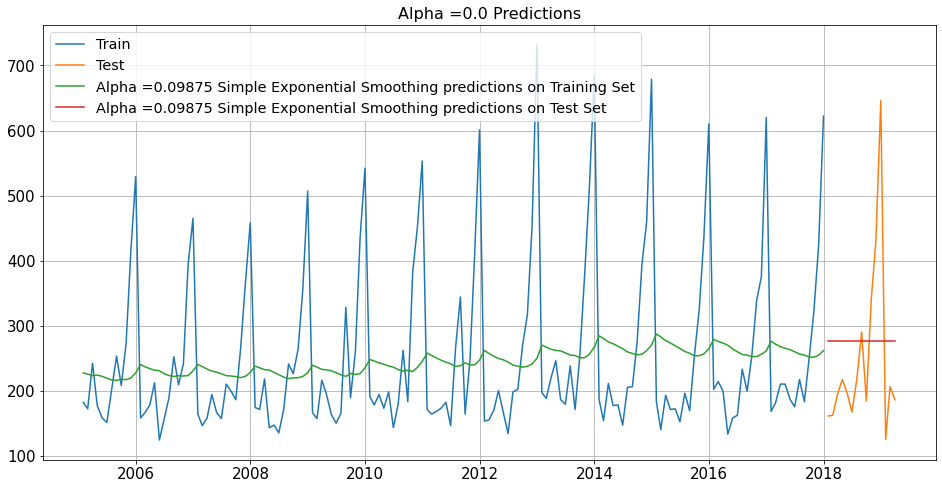

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train["Blood_group_A-"], label='Train')
plt.plot(SES_test["Blood_group_A-"], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.09875 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.09875 Simple Exponential Smoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.0 Predictions');

### Model Evaluation for  𝛼  = 0 : Simple Exponential Smoothing

In [92]:
## Training Data RMSE and MAPE

rmse_model5_train_1 = metrics.mean_squared_error(SES_train["Blood_group_A-"],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train["Blood_group_A-"],SES_train['predict'])
print("For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 130.942 MAPE is 38.41


In [93]:
## Test Data RMSE and MAPE

rmse_model5_test_1 = metrics.mean_squared_error(SES_test["Blood_group_A-"],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test["Blood_group_A-"],SES_test['predict'])
print("For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 133.660 MAPE is 43.71


In [94]:
resultsDf_5_1 = pd.DataFrame({'Model': 'Alpha=0.0,SimpleExponentialSmoothing','Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Model 5.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Model   Test RMSE  Test MAPE
Model 1                        RegressionOnTime  133.355698      43.74
Model 2                              NaiveModel  396.011448     151.96
Model 3                           SimpleAverage  130.630913      39.08
Model 4.1           2pointTrailingMovingAverage   99.294008      25.26
Model 4.2           4pointTrailingMovingAverage  136.519626      43.91
Model 4.3           6pointTrailingMovingAverage  138.069722      47.25
Model 4.4           9pointTrailingMovingAverage  135.834794      45.41
Model 5.1  Alpha=0.0,SimpleExponentialSmoothing  133.660256      43.71

Setting different alpha values.

Remember, the higher the alpha value more weightage is given to the more recent observation.
That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [95]:
    ## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [96]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train["Blood_group_A-"],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train["Blood_group_A-"],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test["Blood_group_A-"],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test["Blood_group_A-"],SES_test['predict',i])
    
    resultsDf_5_2 = resultsDf_5_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [97]:
resultsDf_5_2.sort_values(by = 'Test RMSE')

Alpha Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0           0.01  134.833159       34.14  130.639260      37.54
1           0.02  132.093127       35.70  131.436999      41.17
2           0.03  131.496289       36.77  132.573570      42.66
3           0.04  131.512773       37.54  133.476796      43.55
4           0.05  131.743867       38.13  134.349039      44.29
..           ...         ...         ...         ...        ...
94          0.95  137.699478       34.68  386.432084     148.41
95          0.96  137.910590       34.59  388.386291     149.14
96          0.97  138.129188       34.49  390.320925     149.85
97          0.98  138.355412       34.43  392.236398     150.56
98          0.99  138.589410       34.39  394.133109     151.27

[99 rows x 5 columns]

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


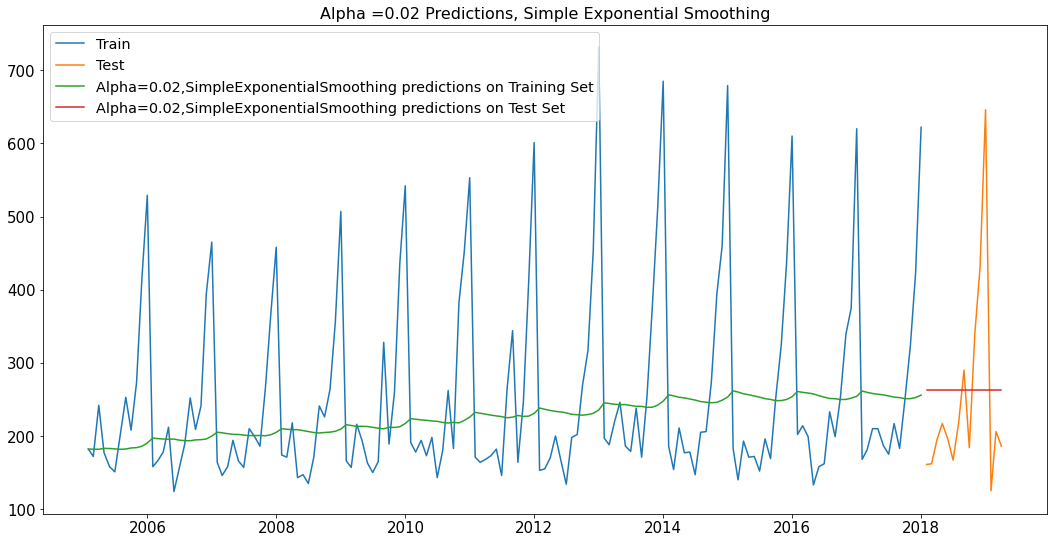

In [98]:
## Plotting on both the Training and Test data 
## Alpha=0.02,SimpleExponentialSmoothing

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train["Blood_group_A-"])

model_SES_fit = model_SES.fit(smoothing_level=0.02,optimized=False,use_brute=True)

SES_train['predict'] = model_SES_fit.fittedvalues
SES_test['predict'] = model_SES_fit.forecast(steps=55)


plt.figure(figsize=(18,9))
plt.plot(SES_train["Blood_group_A-"], label='Train')
plt.plot(SES_test["Blood_group_A-"], label='Test')

plt.plot(SES_train['predict'], label='Alpha=0.02,SimpleExponentialSmoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha=0.02,SimpleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.02 Predictions, Simple Exponential Smoothing')


plt.grid();

In [99]:
resultsDf_5_3 = pd.DataFrame({'Model': ['Alpha=0.02,SimpleExponentialSmoothing'],
                                'Test RMSE': [resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Model 5.2'])

resultsDf = pd.concat([resultsDf, resultsDf_5_3])
resultsDf

Model   Test RMSE  Test MAPE
Model 1                         RegressionOnTime  133.355698      43.74
Model 2                               NaiveModel  396.011448     151.96
Model 3                            SimpleAverage  130.630913      39.08
Model 4.1            2pointTrailingMovingAverage   99.294008      25.26
Model 4.2            4pointTrailingMovingAverage  136.519626      43.91
Model 4.3            6pointTrailingMovingAverage  138.069722      47.25
Model 4.4            9pointTrailingMovingAverage  135.834794      45.41
Model 5.1   Alpha=0.0,SimpleExponentialSmoothing  133.660256      43.71
Model 5.2  Alpha=0.02,SimpleExponentialSmoothing  131.436999      41.17

## Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [100]:
DES_train = train.copy()
DES_test = test.copy()

In [101]:
model_DES = Holt(DES_train["Blood_group_A-"])

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [102]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [103]:
model_DES_autofit.params_formatted

name       param  optimized
smoothing_level  alpha    0.666842       True
smoothing_trend   beta    0.000094       True
initial_level      l.0  181.925400       True
initial_trend      b.0    4.007436       True

In [104]:
test_predictions_model6 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model6.head()

2018-01-31    547.330047
2018-02-28    551.313087
2018-03-31    555.296126
2018-04-30    559.279166
2018-05-31    563.262205
Freq: M, dtype: float64

In [105]:
## Test Data - RMSE and MAPE

rmse_model6_test = metrics.mean_squared_error(DES_test["Blood_group_A-"],test_predictions_model6,squared=False)
mape_model6_test = MAPE(DES_test["Blood_group_A-"],test_predictions_model6)
print("For Alpha=0.647815,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test, mape_model6_test))

For Alpha=0.647815,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set,  RMSE is 350.467 MAPE is 134.76


In [106]:
resultsDf6_1 = pd.DataFrame({'Model': "Alpha=0.666842,Beta=0.000094,DoubleExponentialSmoothing",'Test RMSE': [rmse_model6_test],'Test MAPE': [mape_model6_test]}
                              ,index=['Model 6.1'])

resultsDf = pd.concat([resultsDf, resultsDf6_1])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76

#### Varying the values of Alpha and Beta to get check for lowest test RMSE

In [107]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [108]:
for i in np.arange(0.01,1.01,0.01):
    for j in np.arange(0.01,1.01,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train["Blood_group_A-"],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train["Blood_group_A-"],DES_train['predict',i,j])
        mape_model6_test = MAPE(DES_test["Blood_group_A-"],DES_test['predict',i,j])
        
        resultsDf_6_2 = resultsDf_6_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
<ipython-input-108-7745a196ddc4>:3: FutureWarning: the 'smoothing_sl

In [109]:
resultsDf_6_2

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0             0.01         0.01  485.745108      175.95  350.466517     207.60
1             0.01         0.02  401.268369      144.41  350.466517     101.81
2             0.01         0.03  339.222226      117.82  350.466517      32.10
3             0.01         0.04  295.745867       97.69  350.466517      49.85
4             0.01         0.05  266.683064       87.08  350.466517      73.81
...            ...          ...         ...         ...         ...        ...
9995          1.00         0.96  208.320057       51.16  350.466517     776.39
9996          1.00         0.97  209.328437       51.33  350.466517     779.58
9997          1.00         0.98  210.349383       51.51  350.466517     782.75
9998          1.00         0.99  211.383304       51.68  350.466517     785.90
9999          1.00         1.00  212.430622       51.84  350.466517     789.04

[10000 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [110]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0             0.01         0.01  485.745108      175.95  350.466517     207.60
6663          0.67         0.64  164.232554       42.11  350.466517     591.16
6664          0.67         0.65  164.646910       42.14  350.466517     595.34
6665          0.67         0.66  165.064791       42.18  350.466517     599.46
6666          0.67         0.67  165.486171       42.21  350.466517     603.53

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-111-6f8d7f7490a9>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_fit = model_DES.fit(smoothing_level=0.01,smoothing_slope=0.01,optimized=False,use_brute=True)


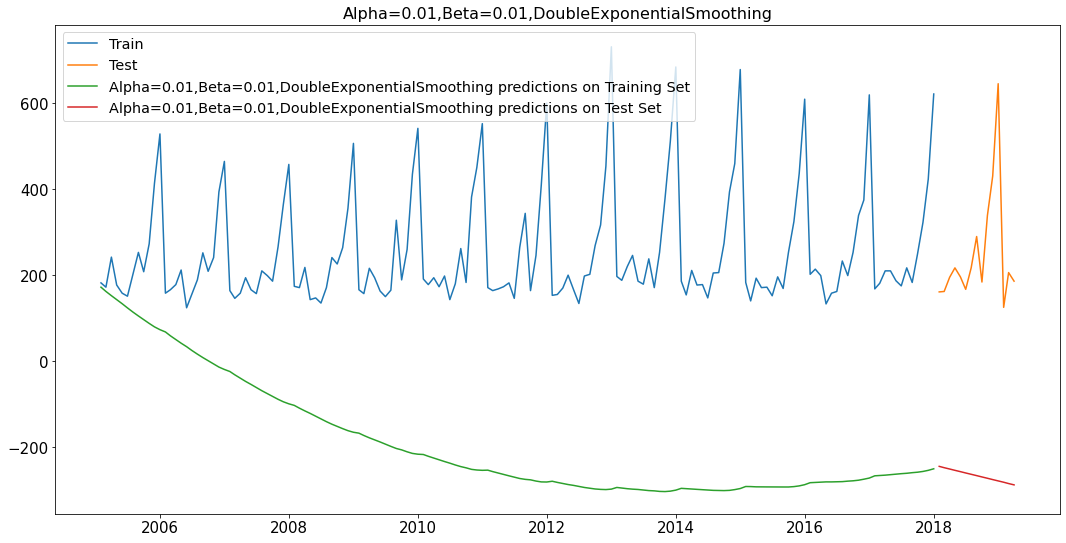

In [111]:
## Plotting on both the Training and Test data 
## Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing

DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train["Blood_group_A-"])

model_DES_fit = model_DES.fit(smoothing_level=0.01,smoothing_slope=0.01,optimized=False,use_brute=True)

DES_train['predict'] = model_DES_fit.fittedvalues
DES_test['predict'] = model_DES_fit.forecast(steps=55)


plt.figure(figsize=(18,9))
plt.plot(DES_train["Blood_group_A-"], label='Train')
plt.plot(DES_test["Blood_group_A-"], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing')


plt.grid();

In [112]:
resultsDf_6_3 = pd.DataFrame({'Model': 'Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing','Test RMSE': [resultsDf_6_2['Test RMSE'][149]],'Test MAPE':[resultsDf_6_2['Test MAPE'][149]]}
                       ,index=['Model 6.2'])




resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [113]:
TES_train = train.copy()
TES_test = test.copy()

In [114]:
model_TES = ExponentialSmoothing(TES_train["Blood_group_A-"],trend='additive',seasonal='additive',freq='M')

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [115]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [116]:
model_TES_autofit.params

{'smoothing_level': 0.05177815341746335,
 'smoothing_trend': 4.496526638947213e-09,
 'smoothing_seasonal': 0.4368943462191258,
 'damping_trend': nan,
 'initial_level': 172.16766042551913,
 'initial_trend': 0.12019847733007288,
 'initial_seasons': array([  2.29275134,  -3.52970348,  40.02491243,  18.06122861,
        -16.83936392, -16.80770115,  28.32946328,  80.07455781,
         37.74568722,  98.26082328, 232.40786557, 338.25790926]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [117]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Blood_group_A-  auto_predict
Time_Stamp                              
2005-01-31             182    174.580610
2005-02-28             172    169.262516
2005-03-31             242    213.079072
2005-04-30             177    192.733059
2005-05-31             158    157.138037

In [118]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Blood_group_A-  auto_predict
Time_Stamp                              
2018-01-31             161    182.386020
2018-02-28             162    182.066457
2018-03-31             195    204.591999
2018-04-30             217    183.864080
2018-05-31             196    176.515629

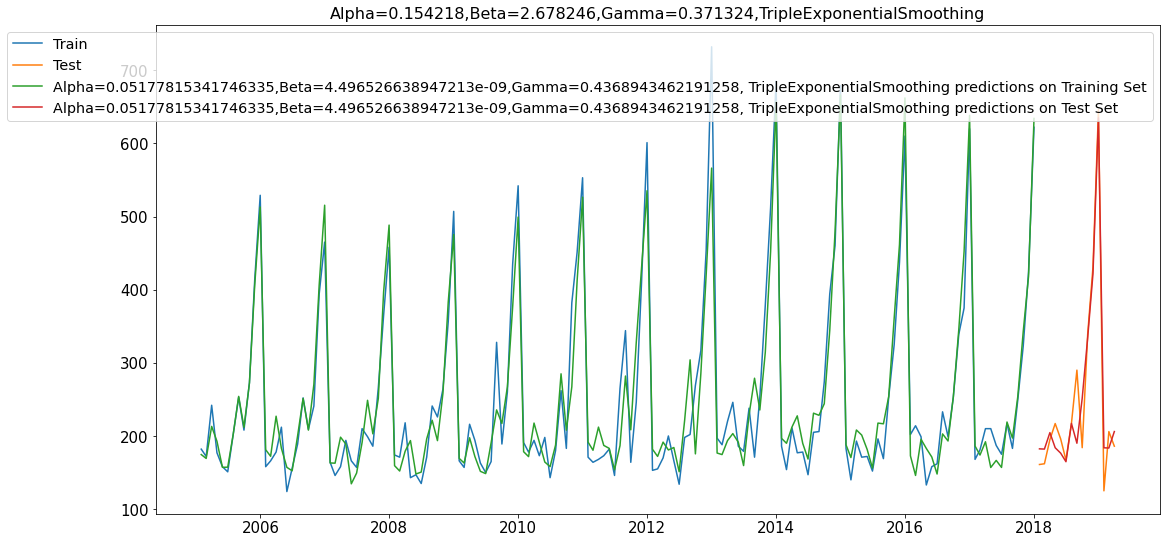

In [119]:
## Plotting on both the Training and Test using autofit
## Alpha=0.154218,Beta=2.678246,Gamma=0.371324,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train["Blood_group_A-"], label='Train')
plt.plot(TES_test["Blood_group_A-"], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, TripleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.154218,Beta=2.678246,Gamma=0.371324,TripleExponentialSmoothing')


plt.grid();

In [120]:
## Training Data

rmse_model7_train_1 = metrics.mean_squared_error(TES_train["Blood_group_A-"],TES_train['auto_predict'],squared=False)
mape_model7_train_1 = MAPE(TES_train["Blood_group_A-"],TES_train['auto_predict'])
print("For Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_train_1, mape_model7_train_1))


For Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.214 MAPE is 10.35


In [121]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test["Blood_group_A-"],TES_test['auto_predict'],squared=False)
mape_model7_test_1 = MAPE(TES_test["Blood_group_A-"],TES_test['auto_predict'])
print("For Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test_1, mape_model7_test_1))

For Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 37.928 MAPE is 10.75


In [122]:
resultsDf_7_1 = pd.DataFrame({'Model': ' Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258,TripleExponentialSmoothing','Test RMSE': [rmse_model7_test_1],'Test MAPE':[mape_model7_test_1]}
                           ,index=['Model 7.1'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75

#### Varying the values of alpha, beta and gamma

In [123]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [124]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model7_train = metrics.mean_squared_error(TES_train["Blood_group_A-"],TES_train['predict',i,j,k],squared=False)
            mape_model7_train = MAPE(TES_train["Blood_group_A-"],TES_train['predict',i,j,k])
        
            rmse_model7_test = metrics.mean_squared_error(TES_test["Blood_group_A-"],TES_test['predict',i,j,k],squared=False)
            mape_model7_test = MAPE(TES_test["Blood_group_A-"],TES_test['predict',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model7_train
                                      ,'Train MAPE': mape_model7_train,'Test RMSE':rmse_model7_test
                                      ,'Test MAPE':mape_model7_test}, ignore_index=True)

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
<ipython-input-124-48977921cffb>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimize

In [125]:
resultsDf_7_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0              0.0          0.0           0.0  1.540500e+02       49.80   
1              0.0          0.0           0.1  1.082751e+02       35.72   
2              0.0          0.0           0.2  8.205809e+01       26.90   
3              0.0          0.0           0.3  6.666260e+01       21.46   
4              0.0          0.0           0.4  5.736179e+01       18.06   
...            ...          ...           ...           ...         ...   
1326           1.0          1.0           0.6  2.344227e+03      502.69   
1327           1.0          1.0           0.7  1.420360e+04     2363.93   
1328           1.0          1.0           0.8  7.991731e+04    11542.57   
1329           1.0          1.0           0.9  3.731480e+05    52536.30   
1330           1.0          1.0           1.0  1.452269e+06   199562.33   

         Test RMSE   Test MAPE  
0     2.624602e+02      104.03  
1     1.534715e+02       60.27  
2     1.008111e+02       38.29  
3     7.563507e+01       27.10  
4     6.324264e+01       21.88  
...            ...         ...  
1326  7.255424e+03     2568.59  
1327  2.118062e+04     6900.43  
1328  4.283484e+05   147550.97  
1329  3.357204e+06  1181878.58  
1330  1.691979e+07  5971799.74  

[1331 rows x 7 columns]

In [126]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
276           0.2          0.3           0.1   45.365728       13.21   
265           0.2          0.2           0.1   43.834429       12.74   
254           0.2          0.1           0.1   42.550577       12.45   
133           0.1          0.1           0.1   41.128261       12.14   
188           0.1          0.6           0.1   44.981941       12.76   

     Test RMSE  Test MAPE  
276  32.679507      10.55  
265  33.117312      10.70  
254  33.234970      10.81  
133  33.375549      10.98  
188  33.390497      11.19

In [127]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
970            0.8          0.0           0.2   45.573887       12.92   
849            0.7          0.0           0.2   44.363236       12.63   
1091           0.9          0.0           0.2   47.026613       13.26   
397            0.3          0.3           0.1   48.321555       14.13   
145            0.1          0.2           0.2   39.448747       11.28   

      Test RMSE  Test MAPE  
970   36.771922       9.84  
849   36.855658       9.92  
1091  37.382743      10.14  
397   33.470821      10.14  
145   34.099463      10.23

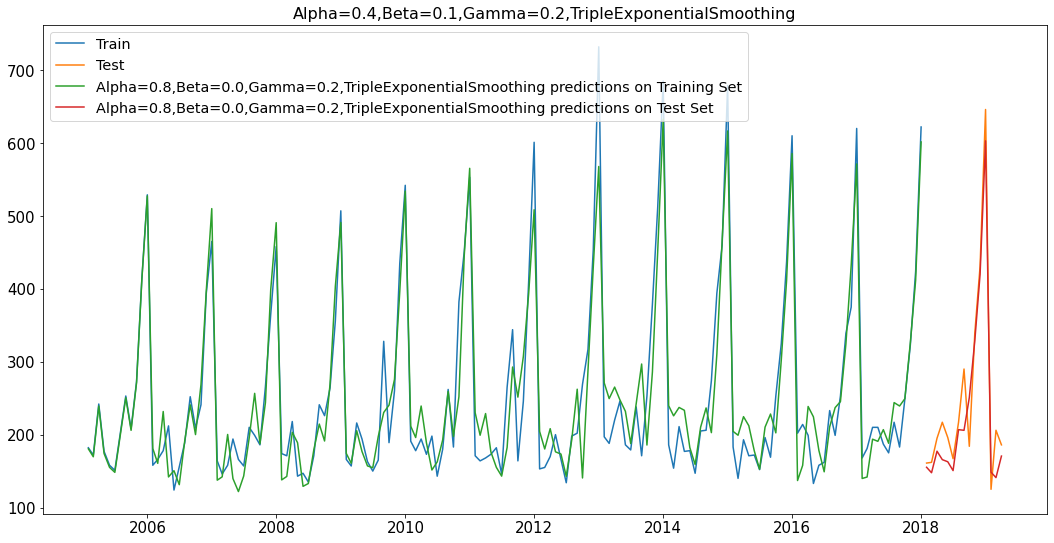

In [128]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
#Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train["Blood_group_A-"], label='Train')
plt.plot(TES_test["Blood_group_A-"], label='Test')

plt.plot(TES_train['predict', 0.4, 0.1, 0.2], label='Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing')
plt.grid();

In [129]:
resultsDf_7_3 = pd.DataFrame({'Model': 'Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing','Test RMSE': [resultsDf_7_2['Test RMSE'][497]],'Test MAPE':[resultsDf_7_2['Test MAPE'][497]]}
                           ,index=['Model 7.2'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...   39.403722   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75  
Model 7.2      12.58

Till now we have built several models and Lowest Test RMSE is given by below two models:
    


In [130]:
resultsDf.sort_values(by = 'Test RMSE').head(2)

Model  Test RMSE  \
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...  37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...  39.403722   

           Test MAPE  
Model 7.1      10.75  
Model 7.2      12.58

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [131]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

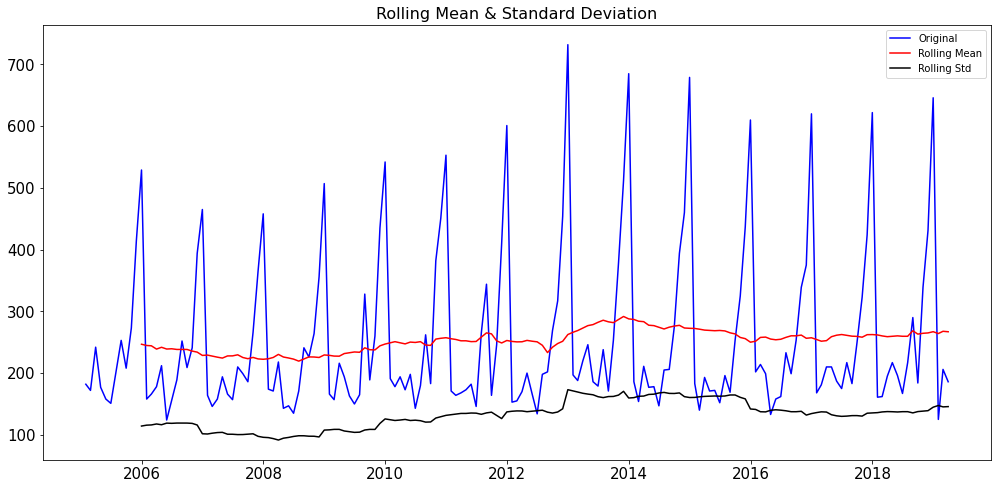

Results of Dickey-Fuller Test:
Test Statistic                  -1.302008
p-value                          0.628253
#Lags Used                      12.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64 



In [132]:
test_stationarity(df_sub["Blood_group_A-"])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.



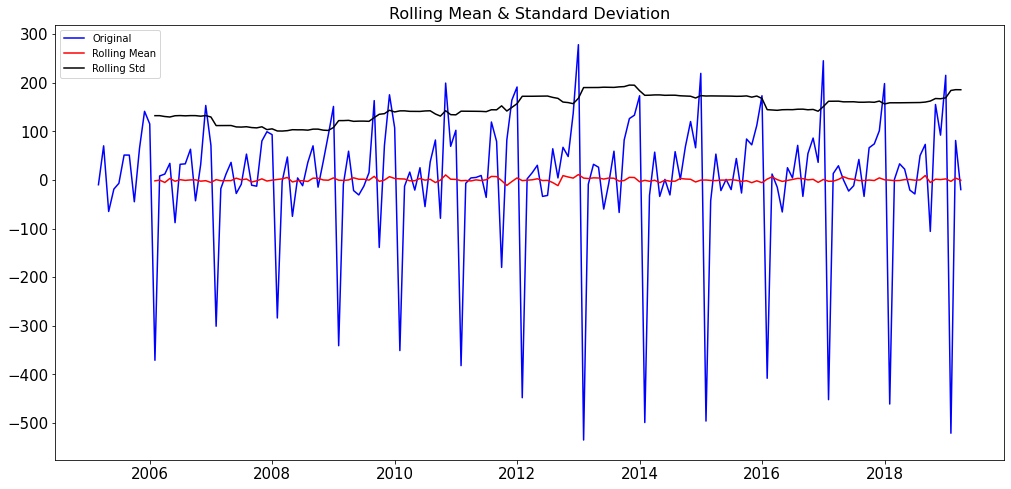

Results of Dickey-Fuller Test:
Test Statistic                -1.021655e+01
p-value                        5.462683e-18
#Lags Used                     1.100000e+01
Number of Observations Used    1.580000e+02
Critical Value (1%)           -3.472431e+00
Critical Value (5%)           -2.880013e+00
Critical Value (10%)          -2.576619e+00
dtype: float64 



In [133]:
test_stationarity(df_sub["Blood_group_A-"].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

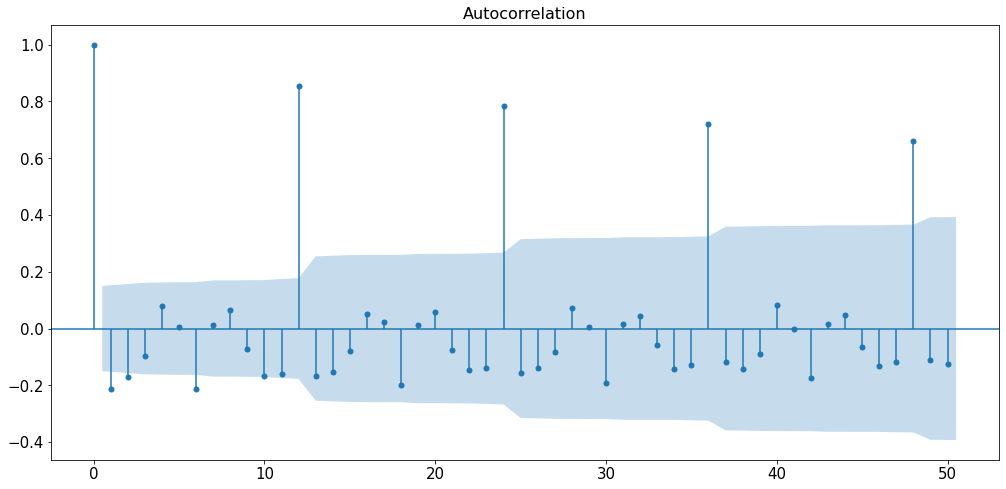

In [135]:
plot_acf(df_sub["Blood_group_A-"].diff().dropna(),lags=50)
plt.show()

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


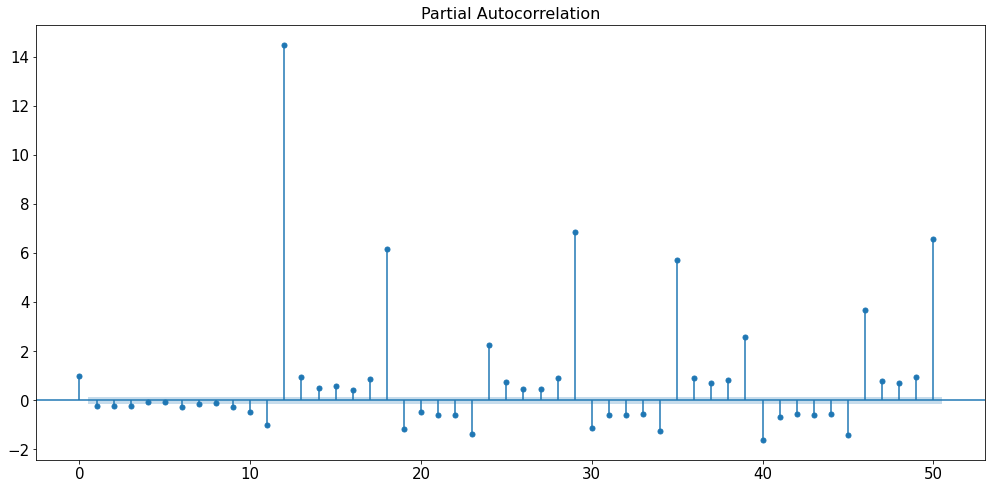

In [136]:
plot_pacf(df_sub["Blood_group_A-"].diff().dropna(),lags=50)
plt.show()

In [137]:
## Series is non-stationary at 5% Alpha as per Dicky Fuller

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Model 8: Automated ARIMA model

In [138]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [139]:
ARIMA_train = train.copy()
ARIMA_test = test.copy()

In [140]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [141]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train["Blood_group_A-"].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1974.1138749573906


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 1) - AIC:1966.2396758912219
ARIMA(0, 1, 2) - AIC:1929.1493960253677
ARIMA(1, 1, 0) - AIC:1971.1206372457368


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

ARIMA(1, 1, 1) - AIC:1930.578078755089
ARIMA(1, 1, 2) - AIC:1929.7652580838596
ARIMA(2, 1, 0) - AIC:1964.8879646256796


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:1928.6478917287545
ARIMA(2, 1, 2) - AIC:1909.188331510674


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [142]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  1909.188332
7  (2, 1, 1)  1928.647892
2  (0, 1, 2)  1929.149396
5  (1, 1, 2)  1929.765258
4  (1, 1, 1)  1930.578079
6  (2, 1, 0)  1964.887965
1  (0, 1, 1)  1966.239676
3  (1, 1, 0)  1971.120637
0  (0, 1, 0)  1974.113875

In [143]:
## ARIMA(2,1,2) has the lowest AIC
mod = ARIMA(ARIMA_train["Blood_group_A-"], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M w

                             ARIMA Model Results                              
Dep. Variable:       D.Blood_group_A-   No. Observations:                  155
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -948.594
Method:                       css-mle   S.D. of innovations            107.184
Date:                Thu, 11 Nov 2021   AIC                           1909.188
Time:                        17:11:32   BIC                           1927.449
Sample:                    02-28-2005   HQIC                          1916.605
                         - 12-31-2017                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3660      0.078      4.708      0.000       0.214       0.518
ar.L1.D.Blood_group_A-     1.2506      0.074     16.948      0.000       1.106       1.395
ar.L

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [144]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA[0]

array([425.96662225, 278.76698464, 200.38638784, 181.76548976,
       200.80798023, 234.7599404 , 267.06825679, 289.28900182,
       299.77937265, 301.03371275, 297.05653127, 291.51224841,
       286.82640712, 284.05838325, 283.22638513])

In [145]:
#Test data RMSE and MAPE
from math import sqrt
from sklearn.metrics import  mean_squared_error
RMSE_autoARIMA = sqrt(mean_squared_error(ARIMA_test['Blood_group_A-'],predicted_autoARIMA[0]))
MAPE_autoARIMA = MAPE(ARIMA_test['Blood_group_A-'],predicted_autoARIMA[0])


print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 139.62253249128818 
MAPE for the autofit ARIMA model: 40.97


In [146]:
resultsDf_8 = pd.DataFrame({'Model':'autoARIMA(2, 1, 2)', 'Test RMSE': RMSE_autoARIMA,'Test MAPE': MAPE_autoARIMA }
                           ,index=['Model 8'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...   39.403722   
Model 8                                   autoARIMA(2, 1, 2)  139.622532   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75  
Model 7.2      12.58  
Model 8        40.97

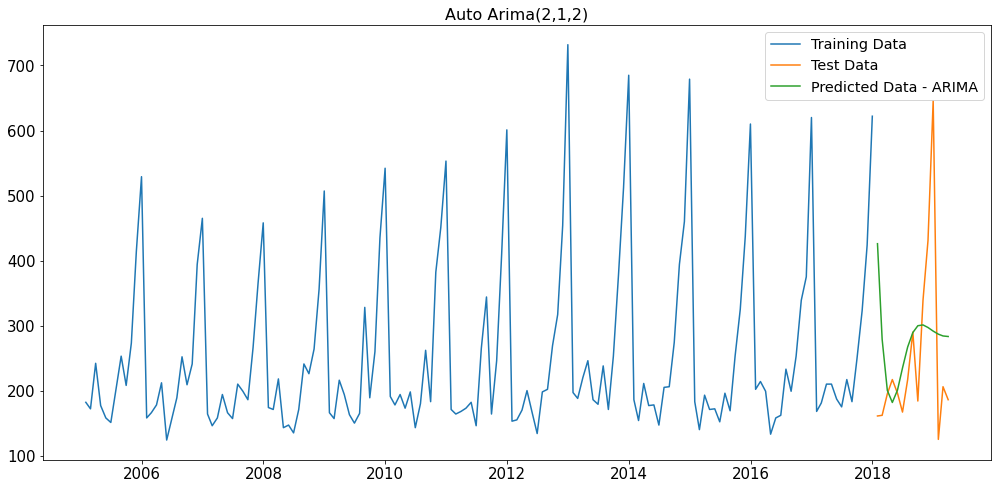

In [147]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA[0],label='Predicted Data - ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Auto Arima(2,1,2)')
plt.grid();

## Model 9: SARIMA model

In [148]:
### As the dataset has seasonality.. Let's build the model with SARIMA
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [149]:
import itertools
p = q = range(0, 3)
d= range(0,3)
D = range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 2, 0)(0, 2, 0, 12)
Model: (0, 2, 1)(0, 2, 1, 12)
Model: (0, 2, 2)(0, 2, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 2, 0)(1, 2, 0, 12)
Model: (1, 2, 1)(1, 2, 1, 12)
Model: (1, 2, 2)(1, 2, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 2, 0)(2, 2, 0, 12)
Model: (2, 2, 1)(2, 2, 1, 12)
Model: (2, 2, 2)(2, 2, 2, 12)


In [150]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Blood_group_A-'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2193.053876615899
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1880.0537423424166
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1639.832937774793
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1476.9463100682892
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1337.90220256281
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1225.744979173905
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:1487.2212542513312
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:1268.0384488546106
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:1126.576287449893
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1488.4640910772525
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1457.1297882225476
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1340.97328485645
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1353.2619540334827
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1339.8938843010365
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1226.750924014272
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:1316.506005900079
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:1258.3827243756857
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:1128.3849859333561
SARIMA(0, 0, 0)x(2, 

SARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:1307.6247778961126
SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:1225.7501522850653
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:1100.3507843927512
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1346.389540914432
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1345.2072433567978
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1316.3103225751656
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1225.3199714542145
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1227.2558737936915
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1195.5190155224122
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:1159.3532834079476
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:1134.0745145629212
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:1101.318558657396
SARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:2078.758980280996
SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:1820.2361430536014
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:1612.3943417687283
SARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:1664.3403830750162
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:1504.2087608270208
SARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:1374.0656910944865
SARIMA(0, 2, 

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 1)x(0, 1, 0, 12) - AIC:1517.8217735174378
SARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:1371.1687343023596
SARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:1249.3714624985394
SARIMA(0, 2, 1)x(0, 2, 0, 12) - AIC:1521.562297679902
SARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:1290.4874245145252
SARIMA(0, 2, 1)x(0, 2, 2, 12) - AIC:1145.946812682707
SARIMA(0, 2, 1)x(1, 0, 0, 12) - AIC:1541.269041957653
SARIMA(0, 2, 1)x(1, 0, 1, 12) - AIC:1498.691198154101
SARIMA(0, 2, 1)x(1, 0, 2, 12) - AIC:1381.2205552553696
SARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:1400.0964653073888
SARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:1373.1670463970818
SARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:1250.639574325761
SARIMA(0, 2, 1)x(1, 2, 0, 12) - AIC:1356.590512695755
SARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:1282.85862063982
SARIMA(0, 2, 1)x(1, 2, 2, 12) - AIC:1147.9465755872493
SARIMA(0, 2, 1)x(2, 0, 0, 12) - AIC:1402.0466897797037
SARIMA(0, 2, 1)x(2, 0, 1, 12) - AIC:1401.1417144816305
SARIMA(0, 2, 1)x(2, 0, 2, 12) - AIC:1380.470875959305
SARIMA(0, 2, 1)x(2,

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 1, 2, 12) - AIC:1193.4646858850078


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 2, 2)x(0, 2, 0, 12) - AIC:1460.5730218270949
SARIMA(0, 2, 2)x(0, 2, 1, 12) - AIC:1238.4684780082603
SARIMA(0, 2, 2)x(0, 2, 2, 12) - AIC:1097.903946424523
SARIMA(0, 2, 2)x(1, 0, 0, 12) - AIC:1486.9368356470886
SARIMA(0, 2, 2)x(1, 0, 1, 12) - AIC:1431.5591502479388
SARIMA(0, 2, 2)x(1, 0, 2, 12) - AIC:1320.0608157179227
SARIMA(0, 2, 2)x(1, 1, 0, 12) - AIC:1351.331663850378
SARIMA(0, 2, 2)x(1, 1, 1, 12) - AIC:1311.0918197611734
SARIMA(0, 2, 2)x(1, 1, 2, 12) - AIC:1194.4791019979248
SARIMA(0, 2, 2)x(1, 2, 0, 12) - AIC:1314.0798730860429
SARIMA(0, 2, 2)x(1, 2, 1, 12) - AIC:1230.6979683422323
SARIMA(0, 2, 2)x(1, 2, 2, 12) - AIC:1099.9034525908348
SARIMA(0, 2, 2)x(2, 0, 0, 12) - AIC:1353.5162191462368
SARIMA(0, 2, 2)x(2, 0, 1, 12) - AIC:1349.3210300087928
SARIMA(0, 2, 2)x(2, 0, 2, 12) - AIC:1319.522077797893
SARIMA(0, 2, 2)x(2, 1, 0, 12) - AIC:1229.9142038011903
SARIMA(0, 2, 2)x(2, 1, 1, 12) - AIC:1227.2364602605053
SARIMA(0, 2, 2)x(2, 1, 2, 12) - AIC:1196.470823982525
SARIMA(0, 2, 2

SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1216.5063082626202
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1218.4674588999696
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1208.1989837821384
SARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:1150.0777285979884
SARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:1125.0127171390589
SARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:1112.345070187446
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1894.6372711470092
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1642.9739085527463
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1450.4985491411107
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1447.91083647614
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1311.2713617129275
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1192.3155277674791
SARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:1450.2674322933144
SARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:1234.9849626517735
SARIMA(1, 1, 2)x(0, 2, 2, 12) - AIC:1100.2615558219854
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1468.322800730531
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1429.7568670292549
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1314.8976504427533
SARIMA(1, 1, 2

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:1449.367912492534


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:1449.3128282987807


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:1307.8364327711367
SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:1191.445018734307
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:1456.1310144180977
SARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:1234.0345536958373
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:1095.403718601376
SARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:1472.9633001260995
SARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:1430.3962263272028
SARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:1318.037231769353
SARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:1338.631201645203
SARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:1309.6421789131687
SARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:1192.7638513829013


C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 2, 2)x(1, 2, 0, 12) - AIC:1300.3718068010478
SARIMA(1, 2, 2)x(1, 2, 1, 12) - AIC:1228.365944081708
SARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:1097.4030197507964
SARIMA(1, 2, 2)x(2, 0, 0, 12) - AIC:1379.8328943128686
SARIMA(1, 2, 2)x(2, 0, 1, 12) - AIC:1338.6639480630638
SARIMA(1, 2, 2)x(2, 0, 2, 12) - AIC:1356.8208477781295
SARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:1217.9615390290364
SARIMA(1, 2, 2)x(2, 1, 1, 12) - AIC:1215.2390039382212
SARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:1194.7496890589632
SARIMA(1, 2, 2)x(2, 2, 0, 12) - AIC:1151.3762949051174
SARIMA(1, 2, 2)x(2, 2, 1, 12) - AIC:1123.4525061431298
SARIMA(1, 2, 2)x(2, 2, 2, 12) - AIC:1099.4028433588428
SARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:1954.2801503405683
SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1711.473021819828
SARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:1516.4623341734548
SARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:1464.7892276845666
SARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:1334.8091347006482
SARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:1223.1696457050152
SARIMA(2, 0,

SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1447.4342817222278
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1312.8757879716093
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1194.0969081499134
SARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:1451.1190138359407
SARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:1236.9196305056764
SARIMA(2, 1, 2)x(0, 2, 2, 12) - AIC:1101.526195878234
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1459.5729438125677
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1431.7016374118684
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1354.1519513593353
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1326.6696680963812
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1314.8709856511814
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1195.6614231868596
SARIMA(2, 1, 2)x(1, 2, 0, 12) - AIC:1285.0144718671188
SARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:1228.8204333282144
SARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:1103.5123167743782
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1361.6574400304812
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1327.2344645442313
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1317.9639645690568
SARIMA(2, 1

In [151]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
467  (1, 2, 2)  (0, 2, 2, 12)  1095.403719
710  (2, 2, 2)  (0, 2, 2, 12)  1096.606398
476  (1, 2, 2)  (1, 2, 2, 12)  1097.403020
224  (0, 2, 2)  (0, 2, 2, 12)  1097.903946
143  (0, 1, 2)  (0, 2, 2, 12)  1098.495754

In [152]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Blood_group_A-'],
                                order=(1,2,2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     Blood_group_A-   No. Observations:                  156
Model:             SARIMAX(1, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -550.609
Date:                            Thu, 11 Nov 2021   AIC                           1113.217
Time:                                    17:34:06   BIC                           1129.026
Sample:                                01-31-2005   HQIC                          1119.620
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4492      0.156      2.872      0.004       0.143       0.756
ma.L1         -1.9067      0.058   

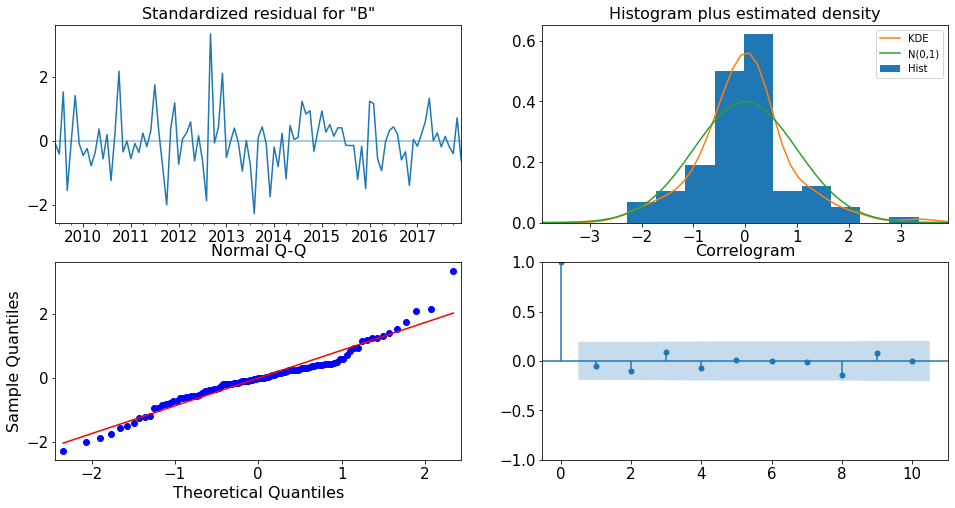

In [153]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [154]:
final_hat_avg =test.copy()
pred_autoSARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_autoSARIMA.predicted_mean

2018-01-31    170.089488
2018-02-28    184.528916
2018-03-31    205.233470
2018-04-30    191.709545
2018-05-31    186.987455
2018-06-30    176.827366
2018-07-31    227.897051
2018-08-31    184.562619
2018-09-30    265.159690
2018-10-31    347.328050
2018-11-30    427.098468
2018-12-31    650.119090
2019-01-31    185.542068
2019-02-28    200.704549
2019-03-31    218.919725
Freq: M, Name: predicted_mean, dtype: float64

In [155]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
RMSE_autoSARIMA = sqrt(mean_squared_error(test['Blood_group_A-'],pred_autoSARIMA.predicted_mean))
MAPE_autoSARIMA = MAPE(test['Blood_group_A-'],pred_autoSARIMA.predicted_mean)


print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 40.17762607839139 
MAPE for the autofit SARIMA model: 10.71


In [156]:
resultsDf_9 = pd.DataFrame({'Model':"autoSARIMA(1, 2, 2)(0, 2, 2)12",'Test RMSE': RMSE_autoSARIMA,'Test MAPE': MAPE_autoSARIMA }
                           ,index=['Model 9'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...   39.403722   
Model 8                                   autoARIMA(2, 1, 2)  139.622532   
Model 9                       autoSARIMA(1, 2, 2)(0, 2, 2)12   40.177626   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75  
Model 7.2      12.58  
Model 8        40.97  
Model 9        10.71

Text(0.5, 1.0, 'autoSARIMA(1, 2, 2)(0, 2, 2)12)')

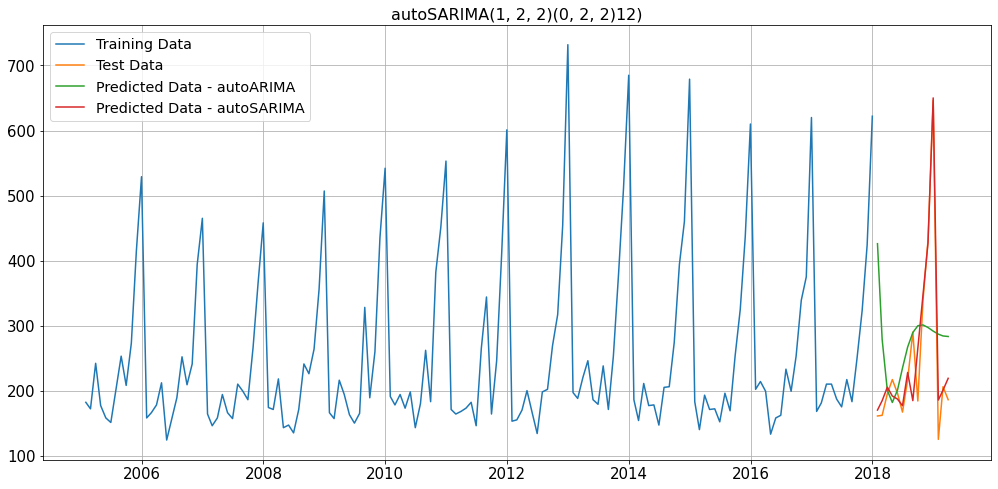

In [157]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA[0],label='Predicted Data - autoARIMA')
plt.plot(test.index,pred_autoSARIMA.predicted_mean,label='Predicted Data - autoSARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('autoSARIMA(1, 2, 2)(0, 2, 2)12)')


In [158]:
## RMSE has reduced in comparison to ARIMA when seasonality was introduced

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Let us look at the ACF and PACF plots on the training data.

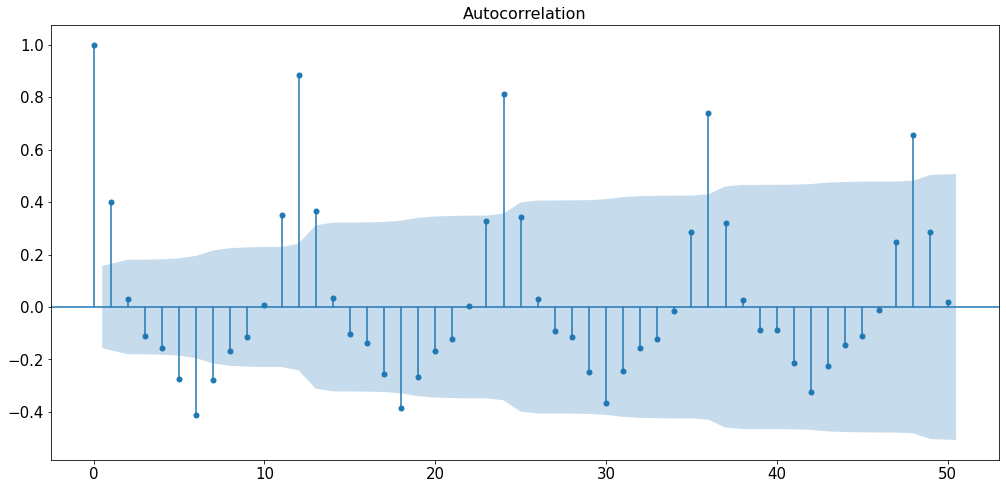

In [159]:
#ACF Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train['Blood_group_A-'],lags=50)

plt.show()

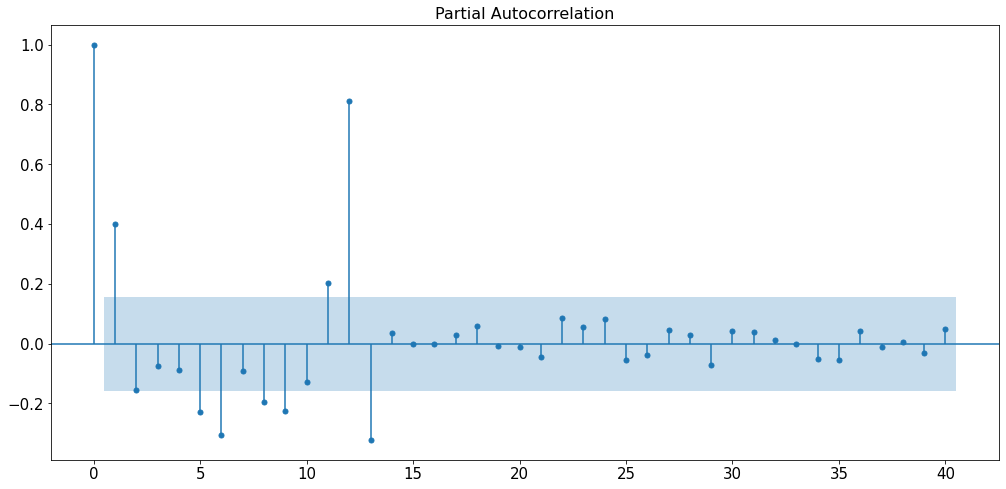

In [160]:
#PACF Plot
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(train['Blood_group_A-'].squeeze(), lags=40, method="ywm")
plt.show()

## Model 10 - ARIMA from acf and pacf plot

In [161]:
#Building the model
from statsmodels.tsa.arima_model import ARIMA

ARIMA_mod = ARIMA(train['Blood_group_A-'], order=(1,1,1))

results_ARIMA_mod  = ARIMA_mod.fit()

print(results_ARIMA_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Blood_group_A-   No. Observations:                  155
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -961.289
Method:                       css-mle   S.D. of innovations            117.857
Date:                Thu, 11 Nov 2021   AIC                           1930.578
Time:                        17:34:09   BIC                           1942.752
Sample:                    02-28-2005   HQIC                          1935.523
                         - 12-31-2017                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4861      0.355      1.368      0.171      -0.210       1.182
ar.L1.D.Blood_group_A-     0.4173      0.076      5.520      0.000       0.269       0.565
ma.L

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M w

In [162]:
predicted_acf_pacf_ARIMA = results_ARIMA_mod.forecast(steps=len(test))

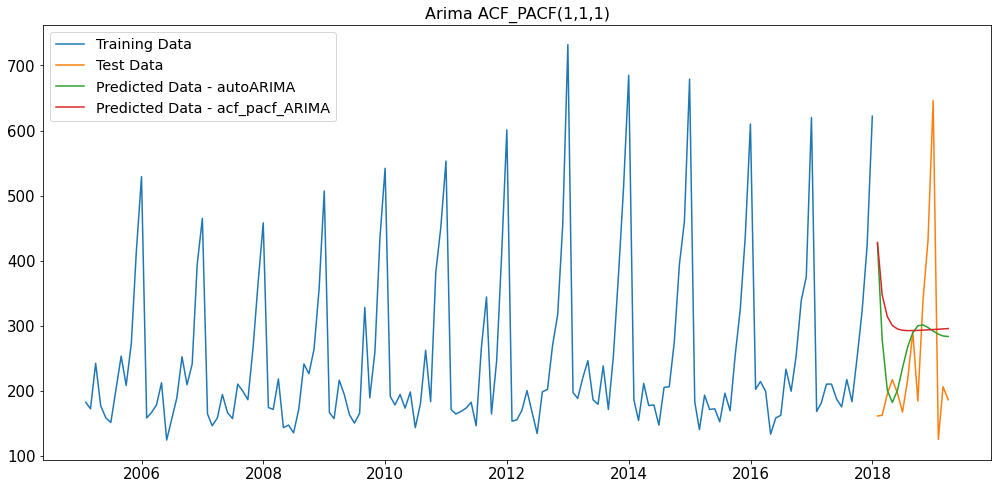

In [163]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA[0],label='Predicted Data - autoARIMA')
plt.plot(test.index,predicted_acf_pacf_ARIMA[0],label='Predicted Data - acf_pacf_ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Arima ACF_PACF(1,1,1)')
plt.grid();

In [164]:
## Test Data - RMSE and MAPE

rmse_model10_test = metrics.mean_squared_error(test['Blood_group_A-'],predicted_acf_pacf_ARIMA[0],squared=False)
mape_model10_test = MAPE(test['Blood_group_A-'],predicted_acf_pacf_ARIMA[0])
print("For ARIMA on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model10_test, mape_model10_test))

For ARIMA on the Test Data,  RMSE is 155.601 and MAPE is 52.88


In [165]:
resultsDf_10 = pd.DataFrame({'Model': 'acf_pacf_ARIMA(1,1,1)','Test RMSE': [rmse_model10_test],'Test MAPE': [mape_model10_test]},index=['Model 10'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...   39.403722   
Model 8                                   autoARIMA(2, 1, 2)  139.622532   
Model 9                       autoSARIMA(1, 2, 2)(0, 2, 2)12   40.177626   
Model 10                               acf_pacf_ARIMA(1,1,1)  155.600554   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75  
Model 7.2      12.58  
Model 8        40.97  
Model 9        10.71  
Model 10       52.88

## Model 12 - SARIMA from acf and pacf plot

In [166]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Blood_group_A-'],freq='M',
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_mod = mod.fit(maxiter=100000)
print(results_SARIMA_mod.summary())

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                     Blood_group_A-   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -655.824
Date:                            Thu, 11 Nov 2021   AIC                           1321.648
Time:                                    17:34:11   BIC                           1335.948
Sample:                                01-31-2005   HQIC                          1327.458
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.092      2.134      0.033       0.016       0.376
ma.L1         -1.0321      0.044   

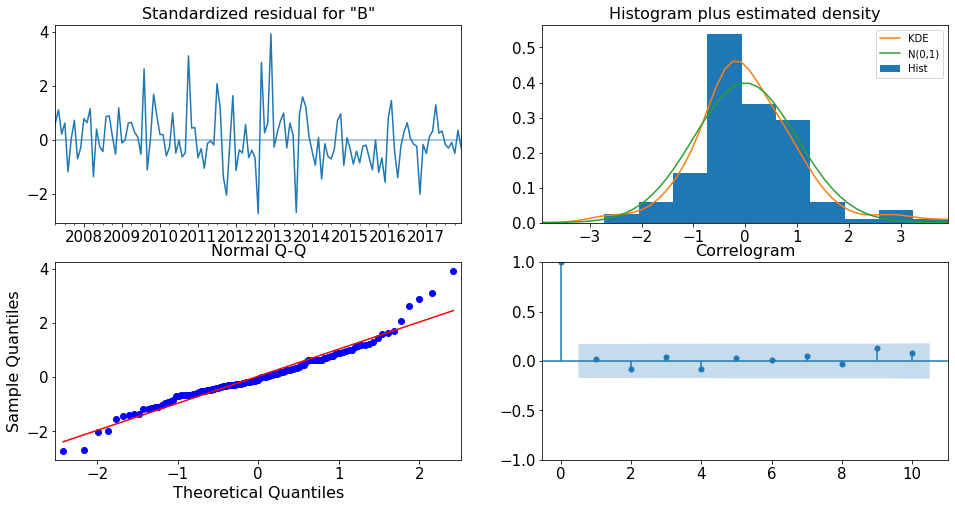

In [167]:
results_SARIMA_mod.plot_diagnostics(figsize=(16, 8))
plt.show()

In [168]:
pred_acf_pacf_SARIMA = results_SARIMA_mod.get_forecast(steps=len(test))
pred_acf_pacf_SARIMA.predicted_mean

2018-01-31    178.879930
2018-02-28    182.038292
2018-03-31    204.554709
2018-04-30    183.992873
2018-05-31    176.879417
2018-06-30    166.304562
2018-07-31    218.313115
2018-08-31    188.699082
2018-09-30    251.640160
2018-10-31    332.981432
2018-11-30    418.617434
2018-12-31    626.512206
2019-01-31    179.730408
2019-02-28    182.294114
2019-03-31    204.742284
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'SArima ACF_PACF(1,1,1)(1,1,1)12')

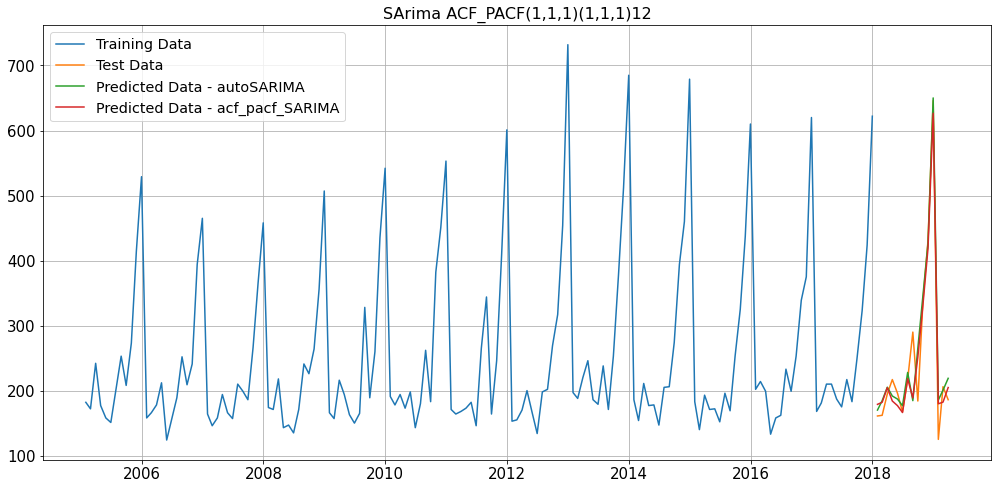

In [169]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_autoSARIMA.predicted_mean,label='Predicted Data - autoSARIMA')
plt.plot(test.index,pred_acf_pacf_SARIMA.predicted_mean,label='Predicted Data - acf_pacf_SARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('SArima ACF_PACF(1,1,1)(1,1,1)12')

In [170]:
## Test Data - RMSE and MAPE

rmse_model11_test = metrics.mean_squared_error(test['Blood_group_A-'],pred_acf_pacf_SARIMA.predicted_mean,squared=False)
mape_model11_test = MAPE(test['Blood_group_A-'],pred_acf_pacf_SARIMA.predicted_mean)
print("For SARIMA on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model11_test, mape_model11_test))

For SARIMA on the Test Data,  RMSE is 37.934 and MAPE is 10.90


In [171]:
resultsDf_11 = pd.DataFrame({'Model': 'acf_pacf_SARIMA(1, 1, 1)(1, 1, 1)12','Test RMSE': [rmse_model11_test],'Test MAPE': [mape_model11_test]}
                           ,index=['Model 11'])


resultsDf = pd.concat([resultsDf,resultsDf_11])

resultsDf

Model   Test RMSE  \
Model 1                                     RegressionOnTime  133.355698   
Model 2                                           NaiveModel  396.011448   
Model 3                                        SimpleAverage  130.630913   
Model 4.1                        2pointTrailingMovingAverage   99.294008   
Model 4.2                        4pointTrailingMovingAverage  136.519626   
Model 4.3                        6pointTrailingMovingAverage  138.069722   
Model 4.4                        9pointTrailingMovingAverage  135.834794   
Model 5.1               Alpha=0.0,SimpleExponentialSmoothing  133.660256   
Model 5.2              Alpha=0.02,SimpleExponentialSmoothing  131.436999   
Model 6.1  Alpha=0.666842,Beta=0.000094,DoubleExponential...  350.466517   
Model 6.2    Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing  350.466517   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947...   37.928010   
Model 7.2  Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponential...   39.403722   
Model 8                                   autoARIMA(2, 1, 2)  139.622532   
Model 9                       autoSARIMA(1, 2, 2)(0, 2, 2)12   40.177626   
Model 10                               acf_pacf_ARIMA(1,1,1)  155.600554   
Model 11                 acf_pacf_SARIMA(1, 1, 1)(1, 1, 1)12   37.934017   

           Test MAPE  
Model 1        43.74  
Model 2       151.96  
Model 3        39.08  
Model 4.1      25.26  
Model 4.2      43.91  
Model 4.3      47.25  
Model 4.4      45.41  
Model 5.1      43.71  
Model 5.2      41.17  
Model 6.1     134.76  
Model 6.2      46.14  
Model 7.1      10.75  
Model 7.2      12.58  
Model 8        40.97  
Model 9        10.71  
Model 10       52.88  
Model 11       10.90

# 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [172]:
pd.options.display.max_colwidth = 100
resultsDf

Model  \
Model 1                                                                                       RegressionOnTime   
Model 2                                                                                             NaiveModel   
Model 3                                                                                          SimpleAverage   
Model 4.1                                                                          2pointTrailingMovingAverage   
Model 4.2                                                                          4pointTrailingMovingAverage   
Model 4.3                                                                          6pointTrailingMovingAverage   
Model 4.4                                                                          9pointTrailingMovingAverage   
Model 5.1                                                                 Alpha=0.0,SimpleExponentialSmoothing   
Model 5.2                                                                Alpha=0.02,SimpleExponentialSmoothing   
Model 6.1                                              Alpha=0.666842,Beta=0.000094,DoubleExponentialSmoothing   
Model 6.2                                                      Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing   
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258,TripleExponential...   
Model 7.2                                              Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing   
Model 8                                                                                     autoARIMA(2, 1, 2)   
Model 9                                                                         autoSARIMA(1, 2, 2)(0, 2, 2)12   
Model 10                                                                                 acf_pacf_ARIMA(1,1,1)   
Model 11                                                                   acf_pacf_SARIMA(1, 1, 1)(1, 1, 1)12   

            Test RMSE  Test MAPE  
Model 1    133.355698      43.74  
Model 2    396.011448     151.96  
Model 3    130.630913      39.08  
Model 4.1   99.294008      25.26  
Model 4.2  136.519626      43.91  
Model 4.3  138.069722      47.25  
Model 4.4  135.834794      45.41  
Model 5.1  133.660256      43.71  
Model 5.2  131.436999      41.17  
Model 6.1  350.466517     134.76  
Model 6.2  350.466517      46.14  
Model 7.1   37.928010      10.75  
Model 7.2   39.403722      12.58  
Model 8    139.622532      40.97  
Model 9     40.177626      10.71  
Model 10   155.600554      52.88  
Model 11    37.934017      10.90

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Sorting the models based on 'Test RMSE'


In [173]:
pd.options.display.max_colwidth = 100
resultsDf.sort_values(by = 'Test RMSE')

Model  \
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258,TripleExponential...   
Model 11                                                                   acf_pacf_SARIMA(1, 1, 1)(1, 1, 1)12   
Model 7.2                                              Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing   
Model 9                                                                         autoSARIMA(1, 2, 2)(0, 2, 2)12   
Model 4.1                                                                          2pointTrailingMovingAverage   
Model 3                                                                                          SimpleAverage   
Model 5.2                                                                Alpha=0.02,SimpleExponentialSmoothing   
Model 1                                                                                       RegressionOnTime   
Model 5.1                                                                 Alpha=0.0,SimpleExponentialSmoothing   
Model 4.4                                                                          9pointTrailingMovingAverage   
Model 4.2                                                                          4pointTrailingMovingAverage   
Model 4.3                                                                          6pointTrailingMovingAverage   
Model 8                                                                                     autoARIMA(2, 1, 2)   
Model 10                                                                                 acf_pacf_ARIMA(1,1,1)   
Model 6.1                                              Alpha=0.666842,Beta=0.000094,DoubleExponentialSmoothing   
Model 6.2                                                      Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing   
Model 2                                                                                             NaiveModel   

            Test RMSE  Test MAPE  
Model 7.1   37.928010      10.75  
Model 11    37.934017      10.90  
Model 7.2   39.403722      12.58  
Model 9     40.177626      10.71  
Model 4.1   99.294008      25.26  
Model 3    130.630913      39.08  
Model 5.2  131.436999      41.17  
Model 1    133.355698      43.74  
Model 5.1  133.660256      43.71  
Model 4.4  135.834794      45.41  
Model 4.2  136.519626      43.91  
Model 4.3  138.069722      47.25  
Model 8    139.622532      40.97  
Model 10   155.600554      52.88  
Model 6.1  350.466517     134.76  
Model 6.2  350.466517      46.14  
Model 2    396.011448     151.96

## Full Model1 - Triple Exponential Smoothing

In [174]:
model_TES_full = ExponentialSmoothing(df_sub['Blood_group_A-'],trend='additive',seasonal='additive',freq='M')

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [175]:
fullmodel1 = model_TES_full.fit(smoothing_level=0.05,smoothing_slope=4.5,smoothing_seasonal=0.44)

<ipython-input-175-46503bc89640>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fullmodel1 = model_TES_full.fit(smoothing_level=0.05,smoothing_slope=4.5,smoothing_seasonal=0.44)


In [176]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_sub['Blood_group_A-'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df_sub['Blood_group_A-'],fullmodel1.fittedvalues)

print('Full_Model_TES (Alpha: 0.05,Beta: 4.5 and Gamma: 0.44): RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

Full_Model_TES (Alpha: 0.05,Beta: 4.5 and Gamma: 0.44): RMSE: 46.10525573479756 
MAPE: 13.73


In [177]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

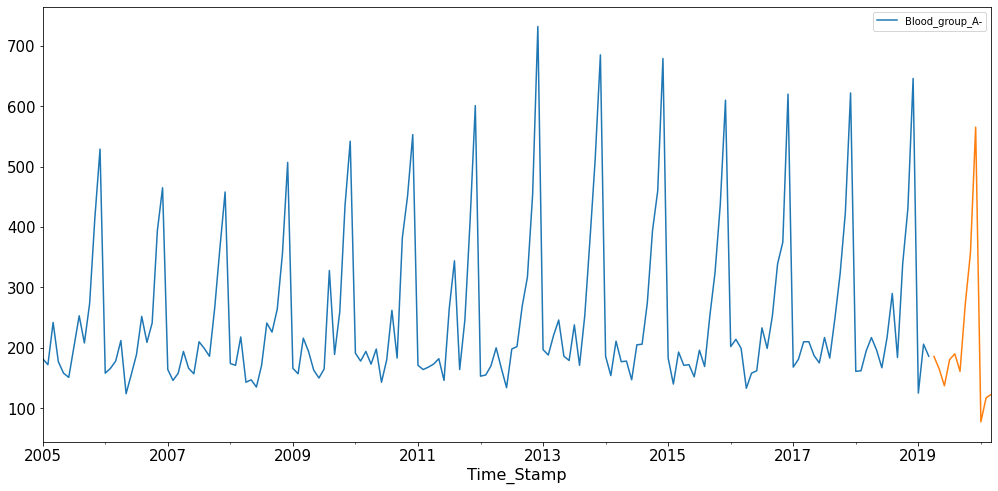

In [178]:
df_sub.plot()
prediction_1.plot();

In [179]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI  prediction    upper_ci
2019-04-30   97.380586  185.752386  693.921607
2019-05-31   76.735550  165.107350  673.276571
2019-06-30   48.845217  137.217017  645.386239
2019-07-31   92.004439  180.376239  688.545460
2019-08-31  101.644463  190.016263  698.185484

Text(0.5, 1.0, 'Triple Exponential Smoothing 0.05,4.5,0.44')

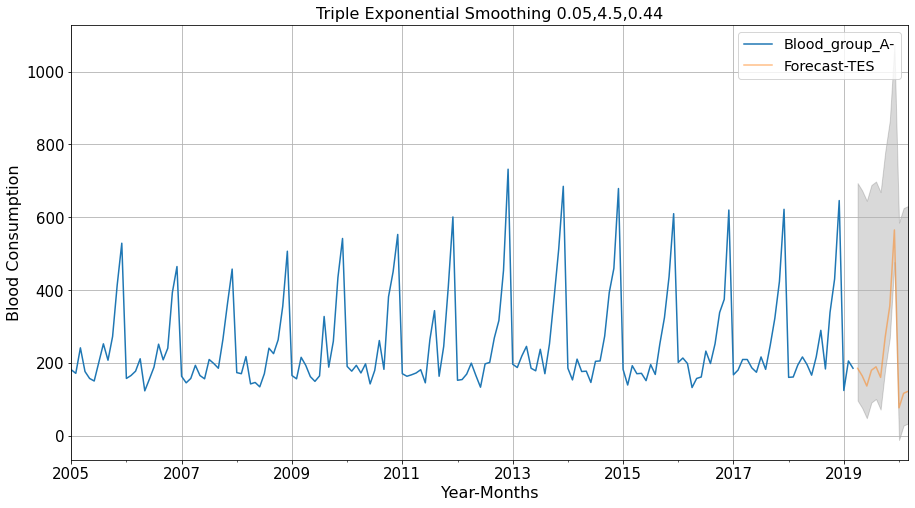

In [180]:
# plot the forecast along with the confidence band

axis = df_sub.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast-TES', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Blood Consumption')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Triple Exponential Smoothing 0.05,4.5,0.44')

## Full Model2 - acf_pacf_SARIMA(1, 2, 2)(0, 2, 2)12

In [181]:
import statsmodels.api as sm

full_SARIMA = sm.tsa.statespace.SARIMAX(df_sub['Blood_group_A-'],freq='M',
                                order=(1,2,2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
fullmodel4 = full_SARIMA.fit(maxiter=100000)
print(fullmodel4.summary())

C:\Users\Anjana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                     Blood_group_A-   No. Observations:                  171
Model:             SARIMAX(1, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -620.958
Date:                            Thu, 11 Nov 2021   AIC                           1253.916
Time:                                    17:34:24   BIC                           1270.540
Sample:                                01-31-2005   HQIC                          1260.666
                                     - 03-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1350      0.103      1.306      0.192      -0.068       0.338
ma.L1         -2.0021    117.931   

In [182]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel4.get_forecast(steps=12)

In [183]:
pred_full_SARIMA_date = pd.DataFrame(prediction_2.summary_frame())
pred_full_SARIMA_date.head()

Blood_group_A-        mean    mean_se  mean_ci_lower  mean_ci_upper
2019-04-30      199.923567  43.557365     114.552700     285.294433
2019-05-31      187.791199  44.693047     100.194436     275.387962
2019-06-30      163.268905  45.041507      74.989174     251.548636
2019-07-31      213.975063  45.329852     125.130186     302.819941
2019-08-31      238.285024  45.621188     148.869139     327.700909

In [184]:
pred_full_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='2019-04',end='2020-04', freq='M'))

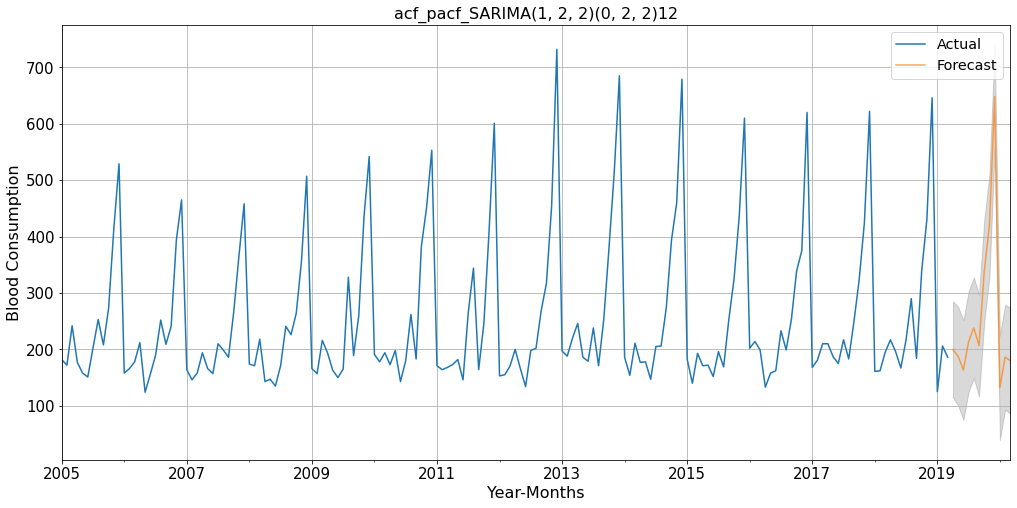

In [185]:
# plot the forecast along with the confidence band

axis = df_sub['Blood_group_A-'].plot(label='Actual')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Blood Consumption')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('acf_pacf_SARIMA(1, 2, 2)(0, 2, 2)12')
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future consumption.

In [186]:
pd.options.display.max_colwidth = 100
resultsDf.sort_values(by = 'Test RMSE')

Model  \
Model 7.1   Alpha=0.05177815341746335,Beta=4.496526638947213e-09,Gamma=0.4368943462191258,TripleExponential...   
Model 11                                                                   acf_pacf_SARIMA(1, 1, 1)(1, 1, 1)12   
Model 7.2                                              Alpha=0.8,Beta=0.0,Gamma=0.2,TripleExponentialSmoothing   
Model 9                                                                         autoSARIMA(1, 2, 2)(0, 2, 2)12   
Model 4.1                                                                          2pointTrailingMovingAverage   
Model 3                                                                                          SimpleAverage   
Model 5.2                                                                Alpha=0.02,SimpleExponentialSmoothing   
Model 1                                                                                       RegressionOnTime   
Model 5.1                                                                 Alpha=0.0,SimpleExponentialSmoothing   
Model 4.4                                                                          9pointTrailingMovingAverage   
Model 4.2                                                                          4pointTrailingMovingAverage   
Model 4.3                                                                          6pointTrailingMovingAverage   
Model 8                                                                                     autoARIMA(2, 1, 2)   
Model 10                                                                                 acf_pacf_ARIMA(1,1,1)   
Model 6.1                                              Alpha=0.666842,Beta=0.000094,DoubleExponentialSmoothing   
Model 6.2                                                      Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing   
Model 2                                                                                             NaiveModel   

            Test RMSE  Test MAPE  
Model 7.1   37.928010      10.75  
Model 11    37.934017      10.90  
Model 7.2   39.403722      12.58  
Model 9     40.177626      10.71  
Model 4.1   99.294008      25.26  
Model 3    130.630913      39.08  
Model 5.2  131.436999      41.17  
Model 1    133.355698      43.74  
Model 5.1  133.660256      43.71  
Model 4.4  135.834794      45.41  
Model 4.2  136.519626      43.91  
Model 4.3  138.069722      47.25  
Model 8    139.622532      40.97  
Model 10   155.600554      52.88  
Model 6.1  350.466517     134.76  
Model 6.2  350.466517      46.14  
Model 2    396.011448     151.96

a)	Blood Consumption for A- is almost constant every year. But it varies hugely from month to month.

b)	There is no significant trend present in the data. There is seasonality (additive) present in the data.

c)	Blood Consumption is highest in the last quarter and in the last quarter also highest in December. 

d)	When we move from December to next year’s January,  there is sudden drop in the Consumption. This drop is very high. 

e)	After January, the consumption is almost constant.  

f)	Hence, Health Care agencies should definitely look at the peak in Q4 and why there is a huge variation when compared with other quarters